In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")
selected_columns = ['Volume', 'Roundness', 'Opacity', 'AmplitudeVariance', 'AmplitudeSkewness', 'DryMassDensity', 'MaxPhase', 'PhaseVariance', 'PhaseSkewness', 'PhaseSTDLocalMean', 'PhaseSTDLocalVariance', 'PhaseSTDLocalSkewness']
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

In [2]:
def plot_points(df_unlabeled, df_labeled, x_col, y_col):
    # Create a figure and two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot 1: Density plot with filled colors
    sns.kdeplot(data=df_unlabeled, x=x_col, y=y_col, cmap='magma', fill=True, thresh=0, levels=np.linspace(0, 1, 30), ax=axs[0])
    axs[0].set_title('Density Plot')
    
    # Plot 2: Scatter plot
    sns.scatterplot(data=df_unlabeled, x=x_col, y=y_col, color='grey', ax=axs[1])
    sns.scatterplot(data=df_labeled, x=x_col, y=y_col, hue='Labels', ax=axs[1])
    axs[1].set_title('Scatter Plot')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the figure
    plt.show()

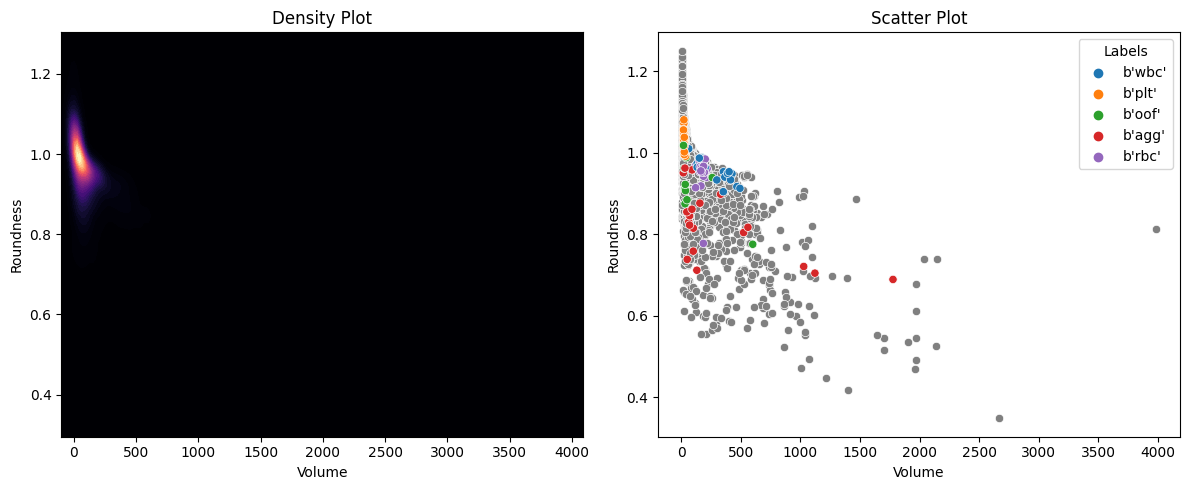

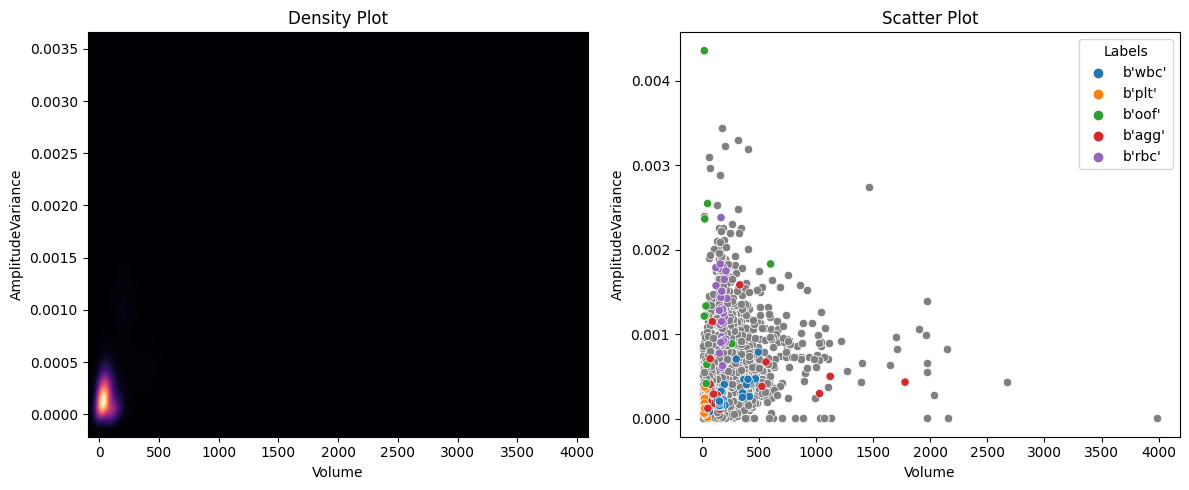

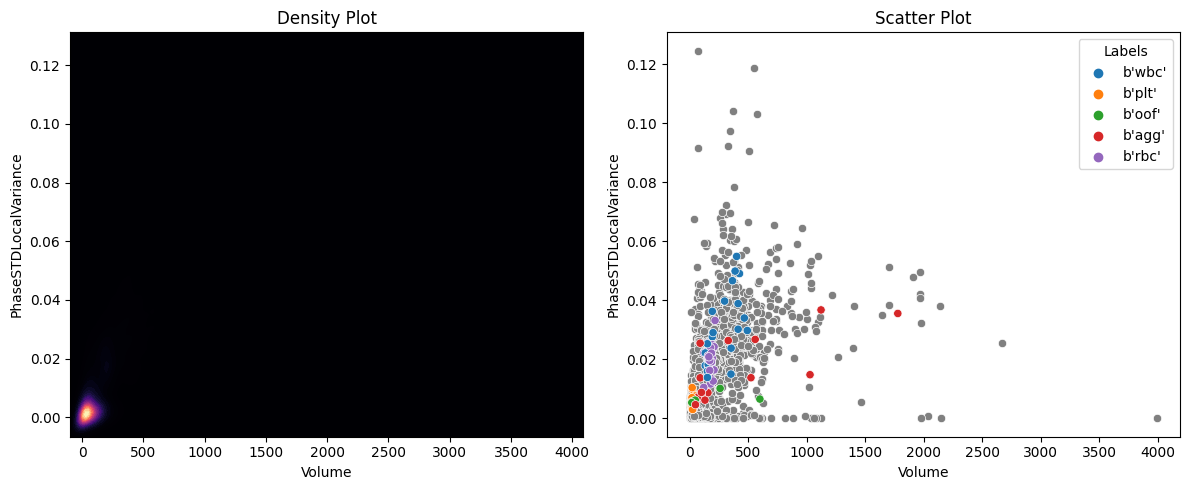

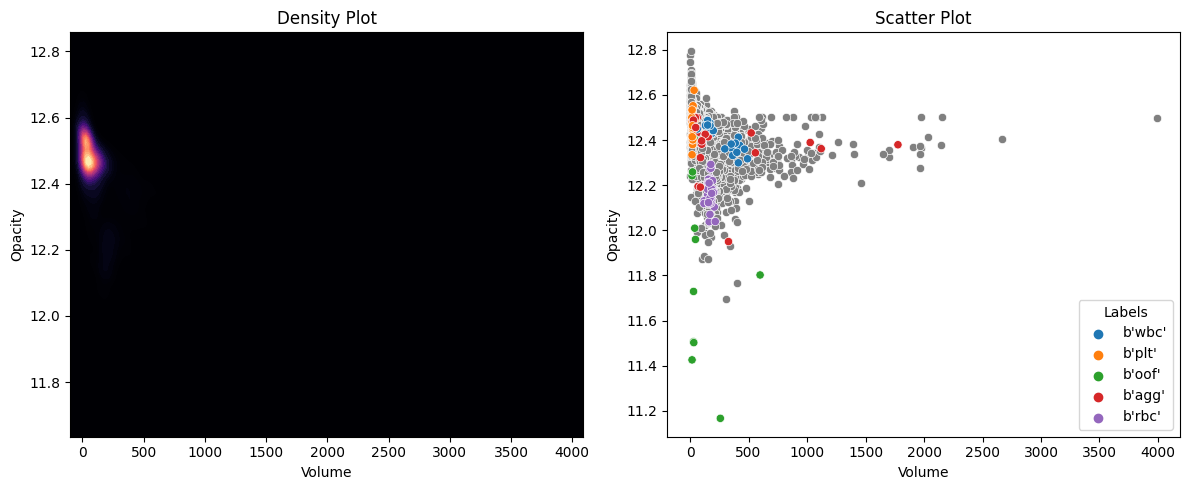

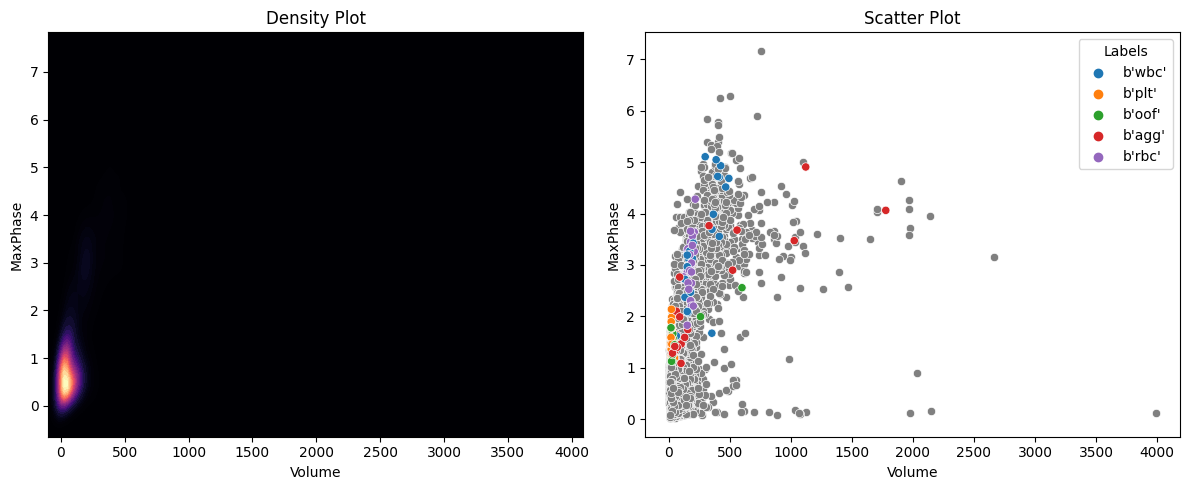

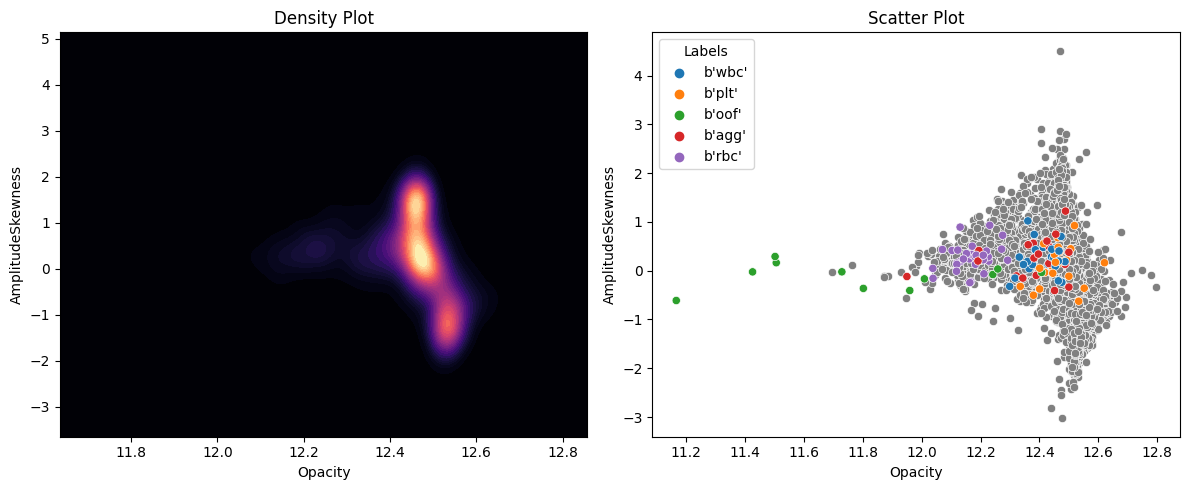

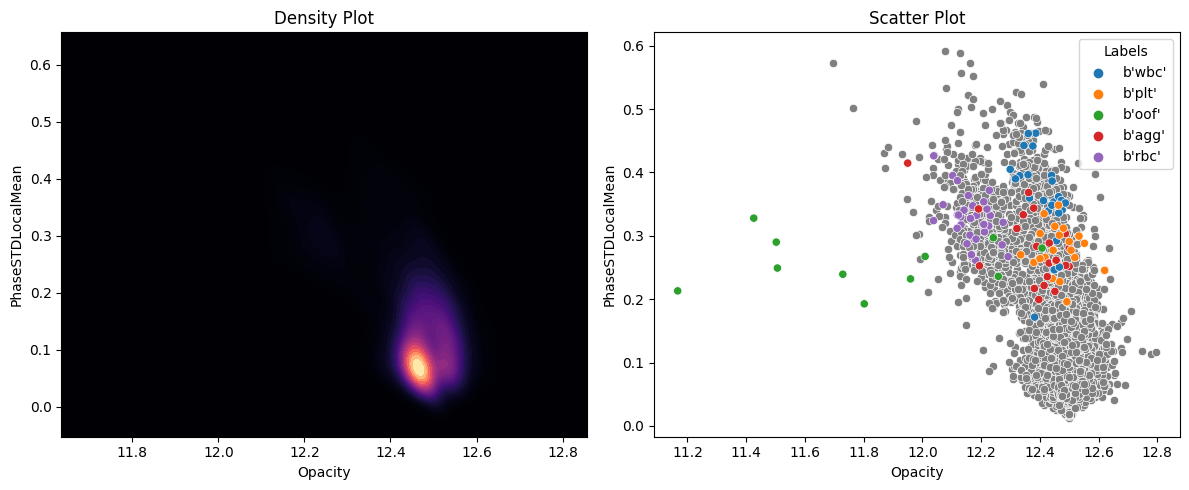

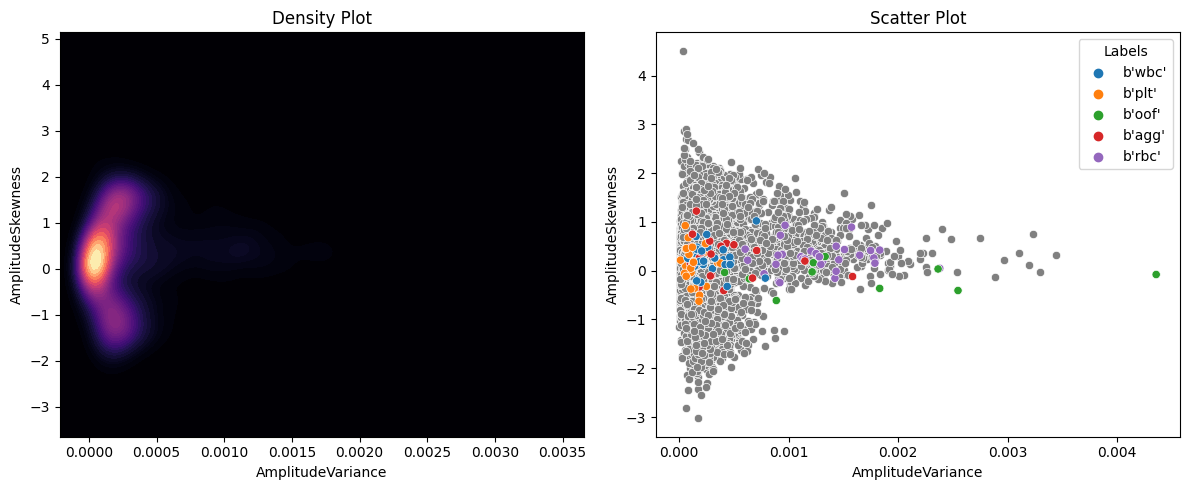

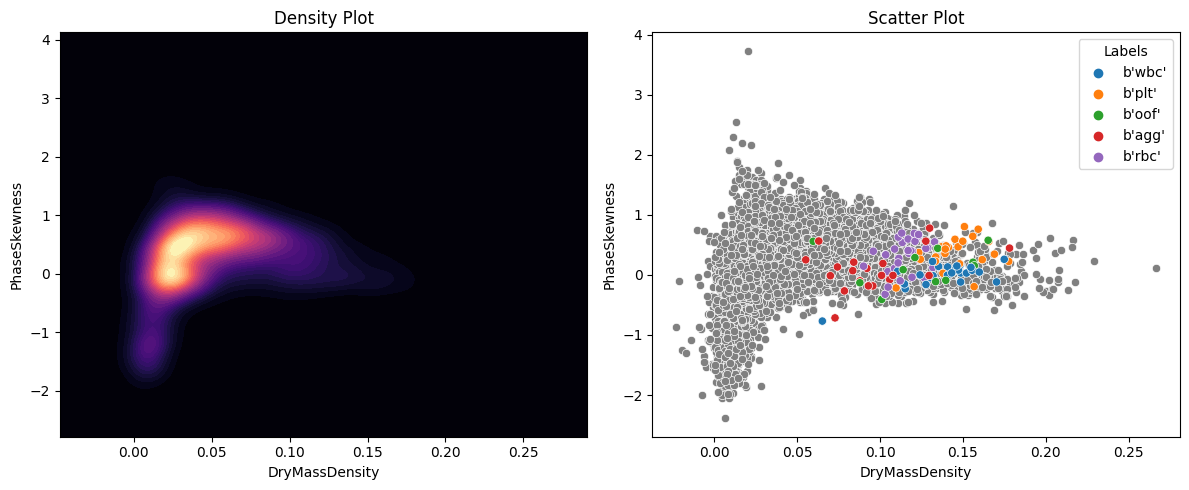

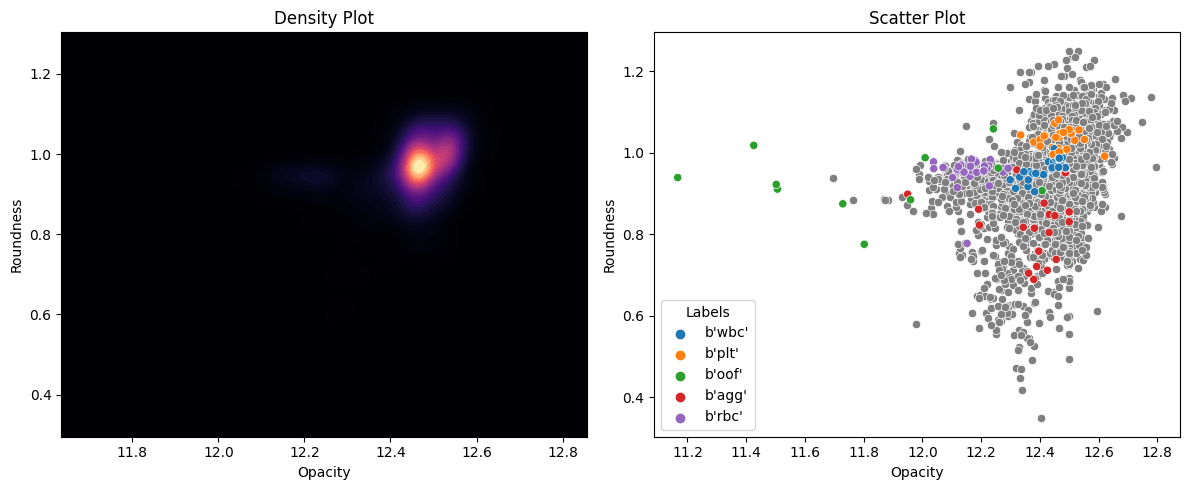

In [3]:


plot_points(df_unlabeled, df_labeled, 'Volume', 'Roundness')
plot_points(df_unlabeled, df_labeled, 'Volume', 'AmplitudeVariance')
plot_points(df_unlabeled, df_labeled, 'Volume', 'PhaseSTDLocalVariance')
plot_points(df_unlabeled, df_labeled, 'Volume', 'Opacity')
plot_points(df_unlabeled, df_labeled, 'Volume', 'MaxPhase')
plot_points(df_unlabeled, df_labeled, 'Opacity', 'AmplitudeSkewness')
plot_points(df_unlabeled, df_labeled, 'Opacity', 'PhaseSTDLocalMean')
plot_points(df_unlabeled, df_labeled, 'AmplitudeVariance', 'AmplitudeSkewness')
plot_points(df_unlabeled, df_labeled, 'DryMassDensity', 'PhaseSkewness')
plot_points(df_unlabeled, df_labeled, 'Opacity', 'Roundness')



In [4]:
from pathlib import Path
import h5py
# Open the HDF5 file
DATA_FOLDER = Path("/home/rai/Documents/MSCE/Sem2/ami/project_datashare")
filepath_unlabeled = DATA_FOLDER / "sample01.pre"
file_unlabeled = h5py.File(filepath_unlabeled, 'r')

# Access the dataset
# List dataset in the file
amplitude_unlabeled = file_unlabeled['amplitude/images']
phase_unlabeled = file_unlabeled['phase/images']

nimgs_unlabeled = np.shape(amplitude_unlabeled)[0]

In [8]:
import pickle
# Load the image_lists from the file
with open('masks_unlabeled.pkl', 'rb') as file:
    masks_unlabeled = pickle.load(file)


In [6]:
filepath = DATA_FOLDER / "prediction.seg"
file = h5py.File(filepath, 'r')

# Access the dataset
# List dataset in the file
amplitude = file['amplitude/images']
phase = file['phase/images']
label = file['label/ground_truth']
mask = file['mask/images']

nimgs = np.shape(amplitude)[0]

mask_array = []
for img_idx in range(nimgs):
    mask_array.append(mask[img_idx])

In [7]:
df_unlabeled[df_unlabeled['DryMassDensity']<0.025]

Volume  Roundness    Opacity  AmplitudeVariance  AmplitudeSkewness  \
3      53.409377   0.784959  12.500000           0.000005          -0.196262   
8     156.685672   0.961822  12.472707           0.000110           1.571649   
11     54.783709   0.969738  12.462620           0.000581           1.492721   
12     22.024852   0.980022  12.421875           0.000470           1.250087   
14     58.207690   0.972437  12.444690           0.000037           0.350308   
...          ...        ...        ...                ...                ...   
7791   24.027111   1.025402  12.465431           0.000074           0.555462   
7793  125.348537   0.960991  12.482295           0.000153           1.711454   
7795  144.150818   0.945403  12.476084           0.000039           0.690753   
7808    9.857276   0.973758  12.500000           0.000006          -0.164914   
7817  136.485364   0.948606  12.456232           0.000194           0.786210   

      DryMassDensity  MaxPhase  PhaseVariance  PhaseSkewness  \
3           0.006130   0.10210       0.000383       0.028868   
8           0.010612   0.20190       0.001250      -0.067732   
11          0.019564   0.38620       0.012958       0.179267   
12          0.022441   0.37770       0.010034       0.753259   
14          0.001167   0.15750       0.011259      -0.921234   
...              ...       ...            ...            ...   
7791        0.012134   0.16210       0.001804       0.057384   
7793        0.014199   0.36550       0.007796      -0.096428   
7795        0.007571   0.27540       0.006639      -1.049510   
7808        0.002759   0.07837       0.000871       0.384950   
7817        0.016640   0.42480       0.019564      -1.400365   

      PhaseSTDLocalMean  PhaseSTDLocalVariance  PhaseSTDLocalSkewness  \
3              0.017292               0.000037               0.899636   
8              0.030231               0.000169               0.602285   
11             0.060648               0.000414              -0.197151   
12             0.069668               0.000526               0.101001   
14             0.057001               0.000412               0.260045   
...                 ...                    ...                    ...   
7791           0.032320               0.000117               0.976272   
7793           0.056822               0.000590               0.464731   
7795           0.047538               0.000342               0.735130   
7808           0.018844               0.000046              -0.172582   
7817           0.092042               0.001875               0.930367   

      Mask ID  Image ID  
3           1         1  
8           0         4  
11          2         6  
12          3         6  
14          5         6  
...       ...       ...  
7791        2       498  
7793        4       498  
7795        6       498  
7808       19       498  
7817       28       498  

[2297 rows x 14 columns]

In [29]:
df_labeled

Volume  Roundness    Opacity  AmplitudeVariance  AmplitudeSkewness  \
0     192.216887   0.961294  12.440019           0.000404           0.222737   
1      17.202843   1.043580  12.334858           0.000249          -0.321839   
2      39.985946   0.987901  12.009360           0.000641          -0.167076   
3    1027.158992   0.721094  12.389170           0.000297          -0.096284   
4     170.606705   0.983194  12.231250           0.000968           0.930308   
..           ...        ...        ...                ...                ...   
106   150.418245   0.986904  12.466542           0.000206           0.403621   
107    17.202843   1.018127  11.425781           0.001215          -0.024194   
108    48.528129   0.738422  12.455611           0.000122           0.748587   
109   297.234792   0.933343  12.360747           0.000706           1.020639   
110   162.905708   0.955535  12.209302           0.000903           0.317180   

     DryMassDensity  MaxPhase  PhaseVariance  PhaseSkewness  \
0          0.148152     3.512       1.347115       0.151507   
1          0.177625     1.396       0.134606       0.224105   
2          0.156106     1.624       0.165807       0.210170   
3          0.087903     3.473       0.955006      -0.100018   
4          0.123606     2.980       0.761022       0.251738   
..              ...       ...            ...            ...   
106        0.114736     2.094       0.384657      -0.152236   
107        0.165244     1.778       0.227547       0.576090   
108        0.084173     1.414       0.107143       0.211272   
109        0.174928     5.105       2.511811       0.259282   
110        0.112155     2.527       0.521451      -0.098832   

     PhaseSTDLocalMean  PhaseSTDLocalVariance  PhaseSTDLocalSkewness  Labels  
0             0.395403               0.036273              -0.059989  b'wbc'  
1             0.270144               0.005691              -0.974006  b'plt'  
2             0.267518               0.007783              -0.571151  b'oof'  
3             0.283486               0.014797               0.634010  b'agg'  
4             0.332043               0.016235               0.237499  b'rbc'  
..                 ...                    ...                    ...     ...  
106           0.250812               0.013855              -0.262903  b'wbc'  
107           0.327947               0.005351              -0.308835  b'oof'  
108           0.261618               0.004633              -0.313514  b'agg'  
109           0.461438               0.039753               0.259262  b'wbc'  
110           0.318104               0.020856               0.152333  b'rbc'  

[111 rows x 13 columns]

In [222]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Assuming you have your feature matrix X and corresponding class labels y
# X should have shape (n_samples, n_features), and y should have shape (n_samples,)

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")
labels = ["b'wbc'", "b'plt'", "b'agg'", "b'rbc'"]

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = list(df_labeled.drop('Labels', axis=1).columns)
for label in labels:
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in labels:
        feature_min, feature_max = feature_ranges[(feature, label)]
        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)


X = labeled_data_with_range.drop("Labels", axis=1)
y = labeled_data_with_range['Labels']

y_binary = ['oof' if label == "b'oof'" else 'in-focus' for label in y]

# Convert class labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_binary)

# Scale feature values to a non-negative range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create an instance of SelectKBest with the chi2 test
k = 10 # Number of top features to select
selector = SelectKBest(k=k)

# Apply feature selection to obtain the top k features
selector.fit(X, y_encoded)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the indices and corresponding feature names
selected_feature_names = X.columns[selected_feature_indices]
print("Selected feature indices:", selected_feature_indices)
print("Selected feature names:", selected_feature_names)

Selected feature indices: [  2  23  34  35  36  37 118 119 120 121]
Selected feature names: Index(['Opacity', 'AmplitudeSTDLocalMin', 'Opacity_Range_b'wbc'',
       'Opacity_Range_b'plt'', 'Opacity_Range_b'agg'', 'Opacity_Range_b'rbc'',
       'AmplitudeSTDLocalMin_Range_b'wbc'',
       'AmplitudeSTDLocalMin_Range_b'plt'',
       'AmplitudeSTDLocalMin_Range_b'agg'',
       'AmplitudeSTDLocalMin_Range_b'rbc''],
      dtype='object')


/tmp/ipykernel_70073/2337006072.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/2337006072.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/2337006072.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

# SMOTE Evaluation on OOF

## Logistic Regression

              precision    recall  f1-score   support

       False       0.98      0.98      0.98        51
        True       0.80      0.80      0.80         5

    accuracy                           0.96        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.96      0.96      0.96        56



/tmp/ipykernel_70073/1292635709.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/1292635709.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/1292635709.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

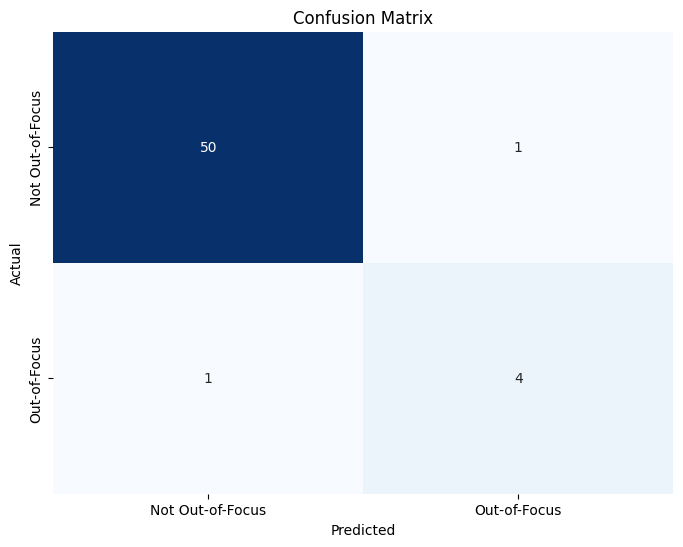

In [205]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")

labels = ["b'wbc'", "b'plt'", "b'agg'", "b'rbc'"]

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = list(df_labeled.drop('Labels', axis=1).columns)
for label in labels:
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in labels:
        feature_min, feature_max = feature_ranges[(feature, label)]
        df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)


selected_columns = ['Opacity', 'AmplitudeSTDLocalMin', "Opacity_Range_b'wbc'",
       "Opacity_Range_b'plt'", "Opacity_Range_b'agg'", "Opacity_Range_b'rbc'",
       "AmplitudeSTDLocalMin_Range_b'wbc'",
       "AmplitudeSTDLocalMin_Range_b'plt'",
       "AmplitudeSTDLocalMin_Range_b'agg'",
       "AmplitudeSTDLocalMin_Range_b'rbc'"]
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

# Step 2: Feature Scaling
#scaler = StandardScaler()
#labeled_data_scaled = scaler.fit_transform(df_labeled.drop('Labels', axis=1))
#unlabeled_data_scaled = scaler.transform(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
#feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
#feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance']  # List of features for range extraction

#for label in df_labeled['Labels'].unique():
#    label_data = df_labeled[df_labeled['Labels'] == label]

#    for feature in feature_range_extraction:
#        feature_min = np.min(label_data[feature])
#        feature_max = np.max(label_data[feature])
#        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
#labeled_data_with_range = df_labeled.copy()
#unlabeled_data_with_range = df_unlabeled.copy()

#for feature in feature_range_extraction:
#    for label in df_labeled['Labels'].unique():
#        feature_min, feature_max = feature_ranges[(feature, label)]
#        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
#        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train, X_test, y_train, y_test = train_test_split(df_labeled.drop('Labels', axis=1), df_labeled['Labels'], test_size=0.5, random_state=42)

out_of_focus_label = "b'oof'"
y_train_binary = np.where(y_train == out_of_focus_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 5: Evaluate the Random Forest classifier
y_pred_binary = pipeline.predict(X_test)
print(classification_report(y_test == out_of_focus_label, y_pred_binary))

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_out_of_focus = df_unlabeled[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_out_of_focus['Predicted_Labels'] = out_of_focus_label

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test == out_of_focus_label, y_pred_binary)

# Step 8: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Out-of-Focus', 'Out-of-Focus'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Out-of-Focus', 'Out-of-Focus'])
plt.show()

## Random Forest

/tmp/ipykernel_70073/524955395.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/524955395.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/524955395.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

              precision    recall  f1-score   support

       False       0.96      0.94      0.95        51
        True       0.50      0.60      0.55         5

    accuracy                           0.91        56
   macro avg       0.73      0.77      0.75        56
weighted avg       0.92      0.91      0.91        56



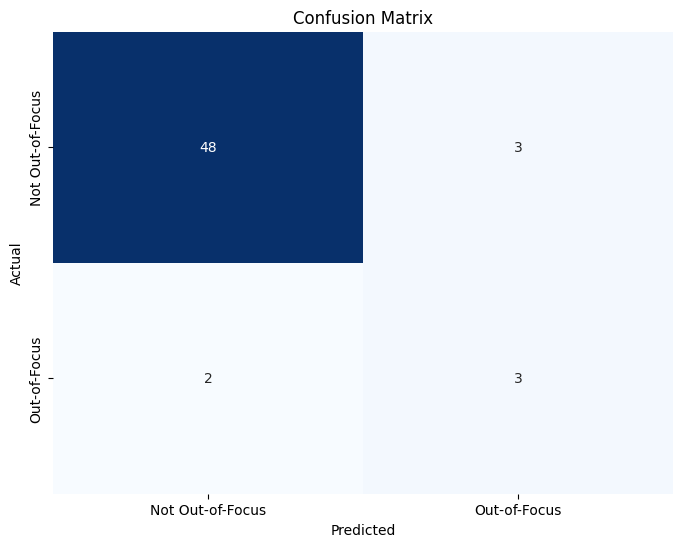

In [206]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")

labels = ["b'wbc'", "b'plt'", "b'agg'", "b'rbc'"]

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = list(df_labeled.drop('Labels', axis=1).columns)
for label in labels:
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in labels:
        feature_min, feature_max = feature_ranges[(feature, label)]
        df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)


selected_columns = ['Opacity', 'AmplitudeSTDLocalMin', "Opacity_Range_b'wbc'",
       "Opacity_Range_b'plt'", "Opacity_Range_b'agg'", "Opacity_Range_b'rbc'",
       "AmplitudeSTDLocalMin_Range_b'wbc'",
       "AmplitudeSTDLocalMin_Range_b'plt'",
       "AmplitudeSTDLocalMin_Range_b'agg'",
       "AmplitudeSTDLocalMin_Range_b'rbc'"]
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

# Step 2: Feature Scaling
#scaler = StandardScaler()
#labeled_data_scaled = scaler.fit_transform(df_labeled.drop('Labels', axis=1))
#unlabeled_data_scaled = scaler.transform(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
#feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
#feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance']  # List of features for range extraction

#for label in df_labeled['Labels'].unique():
#    label_data = df_labeled[df_labeled['Labels'] == label]

#    for feature in feature_range_extraction:
#        feature_min = np.min(label_data[feature])
#        feature_max = np.max(label_data[feature])
#        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
#labeled_data_with_range = df_labeled.copy()
#unlabeled_data_with_range = df_unlabeled.copy()

#for feature in feature_range_extraction:
#    for label in df_labeled['Labels'].unique():
#        feature_min, feature_max = feature_ranges[(feature, label)]
#        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
#        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train, X_test, y_train, y_test = train_test_split(df_labeled.drop('Labels', axis=1), df_labeled['Labels'], test_size=0.5, random_state=42)

out_of_focus_label = "b'oof'"
y_train_binary = np.where(y_train == out_of_focus_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 5: Evaluate the Random Forest classifier
y_pred_binary = pipeline.predict(X_test)
print(classification_report(y_test == out_of_focus_label, y_pred_binary))

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_out_of_focus = df_unlabeled[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_out_of_focus['Predicted_Labels'] = out_of_focus_label

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test == out_of_focus_label, y_pred_binary)

# Step 8: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Out-of-Focus', 'Out-of-Focus'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Out-of-Focus', 'Out-of-Focus'])
plt.show()

## Decision Tree

              precision    recall  f1-score   support

       False       0.96      0.96      0.96        51
        True       0.60      0.60      0.60         5

    accuracy                           0.93        56
   macro avg       0.78      0.78      0.78        56
weighted avg       0.93      0.93      0.93        56



/tmp/ipykernel_70073/3634802178.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/3634802178.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/3634802178.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

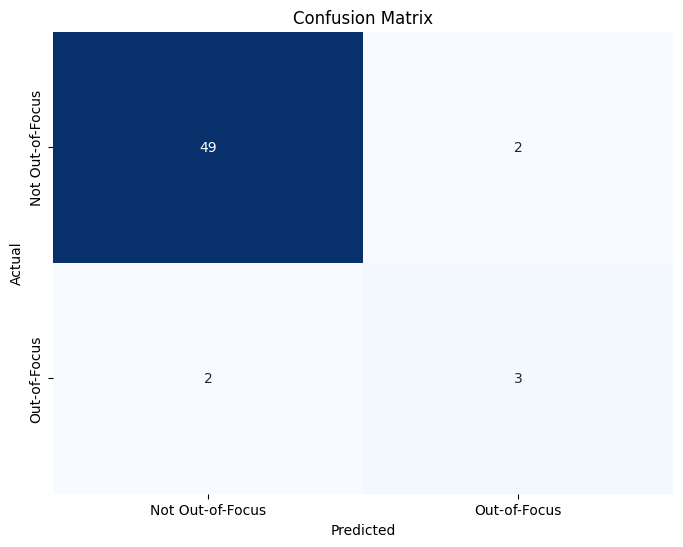

In [207]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")

labels = ["b'wbc'", "b'plt'", "b'agg'", "b'rbc'"]

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = list(df_labeled.drop('Labels', axis=1).columns)
for label in labels:
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in labels:
        feature_min, feature_max = feature_ranges[(feature, label)]
        df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)


selected_columns = ['Opacity', 'AmplitudeSTDLocalMin', "Opacity_Range_b'wbc'",
       "Opacity_Range_b'plt'", "Opacity_Range_b'agg'", "Opacity_Range_b'rbc'",
       "AmplitudeSTDLocalMin_Range_b'wbc'",
       "AmplitudeSTDLocalMin_Range_b'plt'",
       "AmplitudeSTDLocalMin_Range_b'agg'",
       "AmplitudeSTDLocalMin_Range_b'rbc'"]
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

# Step 2: Feature Scaling
#scaler = StandardScaler()
#labeled_data_scaled = scaler.fit_transform(df_labeled.drop('Labels', axis=1))
#unlabeled_data_scaled = scaler.transform(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
#feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
#feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance']  # List of features for range extraction

#for label in df_labeled['Labels'].unique():
#    label_data = df_labeled[df_labeled['Labels'] == label]

#    for feature in feature_range_extraction:
#        feature_min = np.min(label_data[feature])
#        feature_max = np.max(label_data[feature])
#        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
#labeled_data_with_range = df_labeled.copy()
#unlabeled_data_with_range = df_unlabeled.copy()

#for feature in feature_range_extraction:
#    for label in df_labeled['Labels'].unique():
#        feature_min, feature_max = feature_ranges[(feature, label)]
#        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
#        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train, X_test, y_train, y_test = train_test_split(df_labeled.drop('Labels', axis=1), df_labeled['Labels'], test_size=0.5, random_state=42)

out_of_focus_label = "b'oof'"
y_train_binary = np.where(y_train == out_of_focus_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 5: Evaluate the Random Forest classifier
y_pred_binary = pipeline.predict(X_test)
print(classification_report(y_test == out_of_focus_label, y_pred_binary))

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_out_of_focus = df_unlabeled[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_out_of_focus['Predicted_Labels'] = out_of_focus_label

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test == out_of_focus_label, y_pred_binary)

# Step 8: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Out-of-Focus', 'Out-of-Focus'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Out-of-Focus', 'Out-of-Focus'])
plt.show()

# SMOTE Evaluation on AGG

## Logistic Regression

              precision    recall  f1-score   support

       False       1.00      0.90      0.95        20
        True       0.60      1.00      0.75         3

    accuracy                           0.91        23
   macro avg       0.80      0.95      0.85        23
weighted avg       0.95      0.91      0.92        23



/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_70073/908800005.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_aggregate['Predicted_Labels'] = aggregate_label


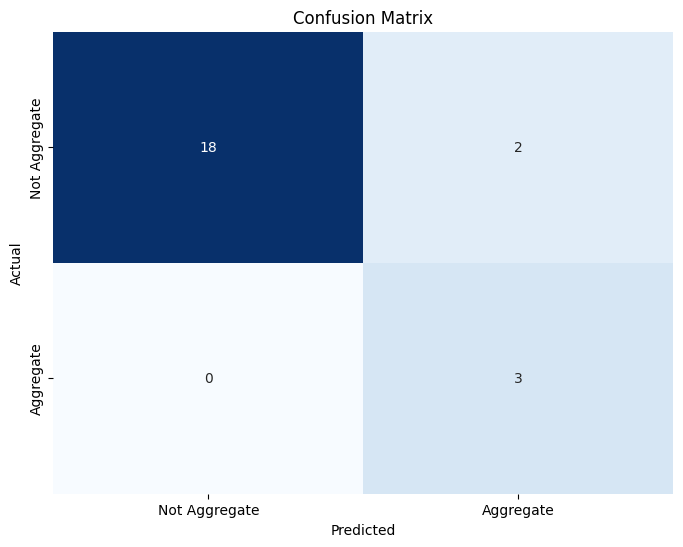

In [155]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")
selected_columns = ['Volume', 'Roundness', 'Opacity', 'AmplitudeVariance', 'AmplitudeSkewness', 'DryMassDensity', 'MaxPhase', 'PhaseVariance', 'PhaseSkewness', 'PhaseSTDLocalMean', 'PhaseSTDLocalVariance', 'PhaseSTDLocalSkewness']
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

# Step 2: Feature Scaling
scaler = StandardScaler()
labeled_data_scaled = scaler.fit_transform(df_labeled.drop('Labels', axis=1))
unlabeled_data_scaled = scaler.transform(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance', 'DryMassDensity']  # List of features for range extraction

for label in df_labeled['Labels'].unique():
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in df_labeled['Labels'].unique():
        feature_min, feature_max = feature_ranges[(feature, label)]
        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train, X_test, y_train, y_test = train_test_split(labeled_data_with_range.drop('Labels', axis=1), labeled_data_with_range['Labels'], test_size=0.2, random_state=42)

aggregate_label = "b'agg'"
y_train_binary = np.where(y_train == aggregate_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 5: Evaluate the Random Forest classifier
y_pred_binary = pipeline.predict(X_test)
print(classification_report(y_test == out_of_focus_label, y_pred_binary))

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(unlabeled_data_with_range.drop(['Mask ID', 'Image ID'], axis=1))

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_aggregate = df_unlabeled[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_aggregate['Predicted_Labels'] = aggregate_label

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test == out_of_focus_label, y_pred_binary)

# Step 8: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Aggregate', 'Aggregate'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Aggregate', 'Aggregate'])
plt.show()

## Decision Tree

              precision    recall  f1-score   support

       False       1.00      0.90      0.95        20
        True       0.60      1.00      0.75         3

    accuracy                           0.91        23
   macro avg       0.80      0.95      0.85        23
weighted avg       0.95      0.91      0.92        23



/tmp/ipykernel_70073/357858003.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_aggregate['Predicted_Labels'] = aggregate_label


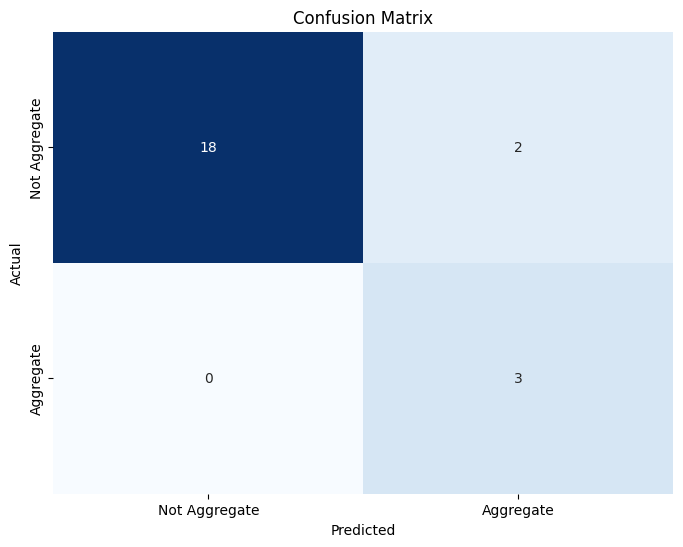

In [154]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")
selected_columns = ['Volume', 'Roundness', 'Opacity', 'AmplitudeVariance', 'AmplitudeSkewness', 'DryMassDensity', 'MaxPhase', 'PhaseVariance', 'PhaseSkewness', 'PhaseSTDLocalMean', 'PhaseSTDLocalVariance', 'PhaseSTDLocalSkewness']
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

# Step 2: Feature Scaling
scaler = StandardScaler()
labeled_data_scaled = scaler.fit_transform(df_labeled.drop('Labels', axis=1))
unlabeled_data_scaled = scaler.transform(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance', 'DryMassDensity']  # List of features for range extraction

for label in df_labeled['Labels'].unique():
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in df_labeled['Labels'].unique():
        feature_min, feature_max = feature_ranges[(feature, label)]
        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train, X_test, y_train, y_test = train_test_split(labeled_data_with_range.drop('Labels', axis=1), labeled_data_with_range['Labels'], test_size=0.2, random_state=42)

aggregate_label = "b'agg'"
y_train_binary = np.where(y_train == aggregate_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 5: Evaluate the Random Forest classifier
y_pred_binary = pipeline.predict(X_test)
print(classification_report(y_test == out_of_focus_label, y_pred_binary))

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(unlabeled_data_with_range.drop(['Mask ID', 'Image ID'], axis=1))

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_aggregate = df_unlabeled[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_aggregate['Predicted_Labels'] = aggregate_label

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test == out_of_focus_label, y_pred_binary)

# Step 8: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Aggregate', 'Aggregate'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Aggregate', 'Aggregate'])
plt.show()

## Random Forest

              precision    recall  f1-score   support

       False       1.00      0.90      0.95        20
        True       0.60      1.00      0.75         3

    accuracy                           0.91        23
   macro avg       0.80      0.95      0.85        23
weighted avg       0.95      0.91      0.92        23



/tmp/ipykernel_70073/1580294920.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_aggregate['Predicted_Labels'] = aggregate_label


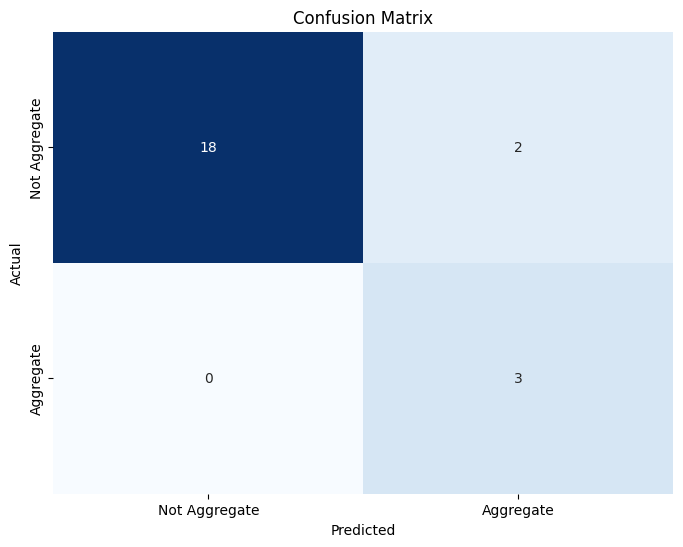

In [153]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")
selected_columns = ['Volume', 'Roundness', 'Opacity', 'AmplitudeVariance', 'AmplitudeSkewness', 'DryMassDensity', 'MaxPhase', 'PhaseVariance', 'PhaseSkewness', 'PhaseSTDLocalMean', 'PhaseSTDLocalVariance', 'PhaseSTDLocalSkewness']
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

# Step 2: Feature Scaling
scaler = StandardScaler()
labeled_data_scaled = scaler.fit_transform(df_labeled.drop('Labels', axis=1))
unlabeled_data_scaled = scaler.transform(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance', 'DryMassDensity']  # List of features for range extraction

for label in df_labeled['Labels'].unique():
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in df_labeled['Labels'].unique():
        feature_min, feature_max = feature_ranges[(feature, label)]
        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train, X_test, y_train, y_test = train_test_split(labeled_data_with_range.drop('Labels', axis=1), labeled_data_with_range['Labels'], test_size=0.2, random_state=42)

aggregate_label = "b'agg'"
y_train_binary = np.where(y_train == aggregate_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100,random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 5: Evaluate the Random Forest classifier
y_pred_binary = pipeline.predict(X_test)
print(classification_report(y_test == out_of_focus_label, y_pred_binary))

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(unlabeled_data_with_range.drop(['Mask ID', 'Image ID'], axis=1))

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_aggregate = df_unlabeled[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_aggregate['Predicted_Labels'] = aggregate_label

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test == out_of_focus_label, y_pred_binary)

# Step 8: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Aggregate', 'Aggregate'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Aggregate', 'Aggregate'])
plt.show()

# SMOTE Oversampling for OOF Binary Classification

In [224]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")

labels = ["b'wbc'", "b'plt'", "b'agg'", "b'rbc'"]

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = list(df_labeled.drop('Labels', axis=1).columns)
for label in labels:
    label_data = df_labeled[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled.copy()
unlabeled_data_with_range = df_unlabeled.copy()

for feature in feature_range_extraction:
    for label in labels:
        feature_min, feature_max = feature_ranges[(feature, label)]
        df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
        df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)


selected_columns = ['Opacity', 'AmplitudeSTDLocalMin', "Opacity_Range_b'wbc'",
       "Opacity_Range_b'plt'", "Opacity_Range_b'agg'", "Opacity_Range_b'rbc'",
       "AmplitudeSTDLocalMin_Range_b'wbc'",
       "AmplitudeSTDLocalMin_Range_b'plt'",
       "AmplitudeSTDLocalMin_Range_b'agg'",
       "AmplitudeSTDLocalMin_Range_b'rbc'"]
df_unlabeled = df_unlabeled[selected_columns+['Mask ID', 'Image ID']]
df_labeled = df_labeled[selected_columns+['Labels']]

# Step 2: Feature Scaling
#scaler = StandardScaler()
#labeled_data_scaled = scaler.fit_transform(df_labeled.drop('Labels', axis=1))
#unlabeled_data_scaled = scaler.transform(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
#feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
#feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance']  # List of features for range extraction

#for label in df_labeled['Labels'].unique():
#    label_data = df_labeled[df_labeled['Labels'] == label]

#    for feature in feature_range_extraction:
#        feature_min = np.min(label_data[feature])
#        feature_max = np.max(label_data[feature])
#        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
#labeled_data_with_range = df_labeled.copy()
#unlabeled_data_with_range = df_unlabeled.copy()

#for feature in feature_range_extraction:
#    for label in df_labeled['Labels'].unique():
#        feature_min, feature_max = feature_ranges[(feature, label)]
#        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
#        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train = df_labeled.drop('Labels', axis=1)
y_train = df_labeled['Labels']

out_of_focus_label = "b'oof'"
y_train_binary = np.where(y_train == out_of_focus_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(df_unlabeled.drop(['Mask ID', 'Image ID'], axis=1))

df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_out_of_focus = df_unlabeled[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_out_of_focus['PredictedLabels'] = out_of_focus_label

df_unlabeled_in_focus = df_unlabeled[unlabeled_predictions_binary == 0]

/tmp/ipykernel_70073/1518572160.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_labeled[f'{feature}_Range_{label}'] = (df_labeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/1518572160.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unlabeled[f'{feature}_Range_{label}'] = (df_unlabeled[feature] - feature_min) / (feature_max - feature_min)
/tmp/ipykernel_70073/1518572160.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [210]:
len(df_labeled_out_of_focus)

11

# SMOTE Oversampling for AGG Binary Classification

In [176]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance', 'DryMassDensity']  # List of features for range extraction

for label in df_labeled_in_focus['Labels'].unique():
    label_data = df_labeled_in_focus[df_labeled_in_focus['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled_in_focus.copy()
unlabeled_data_with_range = df_unlabeled_in_focus.copy()

for feature in feature_range_extraction:
    for label in df_labeled_in_focus['Labels'].unique():
        feature_min, feature_max = feature_ranges[(feature, label)]
        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled_in_focus[feature] - feature_min) / (feature_max - feature_min)
        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled_in_focus[feature] - feature_min) / (feature_max - feature_min)

# Step 4: Train the out-of-focus detection model
X_train = labeled_data_with_range.drop('Labels', axis=1)
y_train =  labeled_data_with_range['Labels']

aggregate_label = "b'agg'"
y_train_binary = np.where(y_train == out_of_focus_label, 1, 0)

# Step 4: Train the Random Forest classifier with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train_binary)

# Step 6: Predict the out-of-focus class for the unlabeled data
unlabeled_predictions_binary = pipeline.predict(unlabeled_data_with_range.drop(['Mask ID', 'Image ID'], axis=1))

# Filter the unlabeled data to include only the out-of-focus images
df_unlabeled_aggregate = df_unlabeled_in_focus[unlabeled_predictions_binary == 1]

# Assign the "out-of-focus" label to the filtered unlabeled data
df_unlabeled_aggregate['PredictedLabels'] = aggregate_label

df_unlabeled_single_cell = df_unlabeled_in_focus[unlabeled_predictions_binary == 0]

/tmp/ipykernel_70073/1486310355.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_aggregate['PredictedLabels'] = aggregate_label


In [177]:
df_unlabeled_aggregate

Volume  Roundness    Opacity  AmplitudeVariance  AmplitudeSkewness  \
1359   23.884939   1.031357  12.548077           0.000488          -1.139049   
2354   47.935745   0.818003  12.598339           0.000766          -0.923773   
6855   17.202843   1.010860  12.555804           0.000485          -0.646033   
7057  229.169826   0.879923  12.053571           0.000803           0.195670   

      DryMassDensity  MaxPhase  PhaseVariance  PhaseSkewness  \
1359        0.056550     0.685       0.042424       0.288091   
2354        0.035524     0.736       0.030645       0.222720   
6855        0.081151     0.890       0.057890       0.507587   
7057        0.077885     1.876       0.243056      -0.498988   

      PhaseSTDLocalMean  PhaseSTDLocalVariance  PhaseSTDLocalSkewness  \
1359           0.143728               0.001477              -0.297585   
2354           0.143853               0.001734              -0.085009   
6855           0.170129               0.001624              -0.229616   
7057           0.231193               0.015356               0.555459   

      Mask ID  Image ID PredictedLabels  
1359       34        78          b'agg'  
2354       30       143          b'agg'  
6855        7       420          b'agg'  
7057        1       441          b'agg'

In [167]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df_labeled_in_focus = df_labeled[df_labeled['Labels'] != "b'oof"]


# Step 3: Feature Engineering - Calculate typical ranges for selected features and each label
feature_ranges = {}  # Dictionary to store typical ranges for each feature and each label
feature_range_extraction = ['Volume', 'Opacity', 'Roundness', 'AmplitudeVariance']  # List of features for range extraction

for label in df_labeled_in_focus['Labels'].unique():
    label_data = df_labeled_in_focus[df_labeled['Labels'] == label]

    for feature in feature_range_extraction:
        feature_min = np.min(label_data[feature])
        feature_max = np.max(label_data[feature])
        feature_ranges[(feature, label)] = (feature_min, feature_max)

# Create new features based on the calculated typical ranges
labeled_data_with_range = df_labeled_in_focus.copy()
unlabeled_data_with_range = df_unlabeled_in_focus.copy()

for feature in feature_range_extraction:
    for label in df_labeled['Labels'].unique():
        feature_min, feature_max = feature_ranges[(feature, label)]
        labeled_data_with_range[f'{feature}_Range_{label}'] = (df_labeled_in_focus[feature] - feature_min) / (feature_max - feature_min)
        unlabeled_data_with_range[f'{feature}_Range_{label}'] = (df_unlabeled_in_focus[feature] - feature_min) / (feature_max - feature_min)

classifier = SVC()

# Step 4: Train the Classification Model
X_train, X_val, y_train, y_val = train_test_split(labeled_data_with_range.drop('Labels', axis=1), labeled_data_with_range['Labels'], test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = classifier.predict(X_val)
print(classification_report(y_val, y_pred))

# Step 6: Predict the Categories of Unlabeled Images
unlabeled_predictions = classifier.predict(unlabeled_data_with_range.drop(['Mask ID', 'Image ID'], axis=1))
df_unlabeled_in_focus['PredictedLabels'] = unlabeled_predictions

              precision    recall  f1-score   support

      b'agg'       0.00      0.00      0.00         3
      b'oof'       0.00      0.00      0.00         1
      b'plt'       0.50      1.00      0.67         4
      b'rbc'       0.50      1.00      0.67         7
      b'wbc'       1.00      0.12      0.22         8

    accuracy                           0.52        23
   macro avg       0.40      0.42      0.31        23
weighted avg       0.59      0.52      0.40        23



/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [225]:
df_unlabeled = pd.concat([df_unlabeled_out_of_focus, df_unlabeled_in_focus])

In [226]:
df_unlabeled

Volume  Roundness    Opacity  AmplitudeVariance  AmplitudeSkewness  \
656   177.715318   0.949224  12.095424           0.001502           0.367221   
718    85.303352   0.909583  12.429270           0.000525           0.214118   
807   400.357067   0.882943  11.764706           0.003199           0.120935   
809   309.224652   0.937615  11.696824           0.003300          -0.021811   
1046    6.066016   1.132878  12.364477           0.000281           0.284756   
...          ...        ...        ...                ...                ...   
7820   71.086127   0.985532  12.500000           0.000033           0.025513   
7821   33.173526   0.734917  12.493323           0.000057           0.407178   
7822  315.432841   0.927747  12.145110           0.002485           0.642907   
7823  591.472120   0.699009  12.269433           0.000968           1.670282   
7824  219.205920   0.924799  12.257653           0.000709           0.363448   

      MaxAmplitude  MinAmplitude  DryMassDensity  MaxPhase  MinPhase  ...  \
656        0.12940     -0.027450        0.096496    2.7500 -0.085300  ...   
718        0.05884     -0.035300        0.101851    2.2500 -0.101800  ...   
807        0.22350     -0.105900        0.152625    5.7770 -0.385700  ...   
809        0.20000     -0.047060        0.207208    5.8480 -0.370800  ...   
1046       0.04315     -0.011765        0.111680    0.7563  0.170000  ...   
...            ...           ...             ...       ...       ...  ...   
7820       0.01569     -0.015690        0.039307    0.5310 -0.014940  ...   
7821       0.01960     -0.015690        0.031562    0.6130  0.003052  ...   
7822       0.16080     -0.047060        0.059955    2.2580 -0.145500  ...   
7823       0.14900     -0.019600        0.039162    3.6660 -0.260300  ...   
7824       0.10200     -0.027450        0.076153    2.6290 -0.096800  ...   

      AmplitudeSTDLocalMean  AmplitudeSTDLocalVariance  \
656                0.024713                   0.000105   
718                0.015239                   0.000032   
807                0.031137                   0.000155   
809                0.035303                   0.000303   
1046               0.012637                   0.000009   
...                     ...                        ...   
7820               0.004446                   0.000002   
7821               0.005422                   0.000002   
7822               0.027012                   0.000312   
7823               0.014992                   0.000182   
7824               0.015655                   0.000071   

      AmplitudeSTDLocalSkewness  AmplitudeSTDLocalKurtosis  \
656                    0.172371                   2.145065   
718                    0.599949                   2.907779   
807                    0.646168                   3.330023   
809                    0.806494                   3.281816   
1046                  -0.528279                   2.118371   
...                         ...                        ...   
7820                   0.805170                   3.571471   
7821                   0.821741                   3.741352   
7822                   0.674044                   2.393197   
7823                   1.061051                   3.258125   
7824                   1.006284                   3.774960   

      AmplitudeSTDLocalMin  AmplitudeSTDLocalMax  \
656               0.006753              0.050269   
718               0.005705              0.032253   
807               0.009007              0.078427   
809               0.007440              0.095442   
1046              0.006404              0.017003   
...                    ...                   ...   
7820              0.001735              0.008939   
7821              0.002667              0.010248   
7822              0.001339              0.075142   
7823              0.000980              0.056489   
7824              0.003978              0.045310   

      AmplitudeSTDLocalCentroidDisplacement  Mask ID  Ima

In [127]:
def plot_points_oof(df_unlabeled_oof, df_labeled_oof, df_unlabeled_if, df_labeled_if, feature1, feature2):
    # Set up the plot
    fig, ax = plt.subplots()
    
    # Plot labeled points
    ax.scatter(df_unlabeled_oof[feature1], df_unlabeled_oof[feature2],
               color='red', marker='x', alpha=0.2, label='Unlabeled Out of Focus')
    ax.scatter(df_unlabeled_if[feature1], df_unlabeled_if[feature2],
               color='lightgreen', marker='x', alpha=0.2, label='Unlabeled In Focus')
    
    
    ax.scatter(df_labeled_if[feature1], df_labeled_if[feature2],
               color='darkgreen', label='Labeled In Focus')
    ax.scatter(df_labeled_oof[feature1], df_labeled_oof[feature2],
               color='darkred', label='Labeled Out of Focus')
    # Plot unlabeled points
    # Set plot title and labels
    ax.set_title('Scatter Plot')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    
    # Add legend
    ax.legend()
    
    # Show the plot
    plt.show()

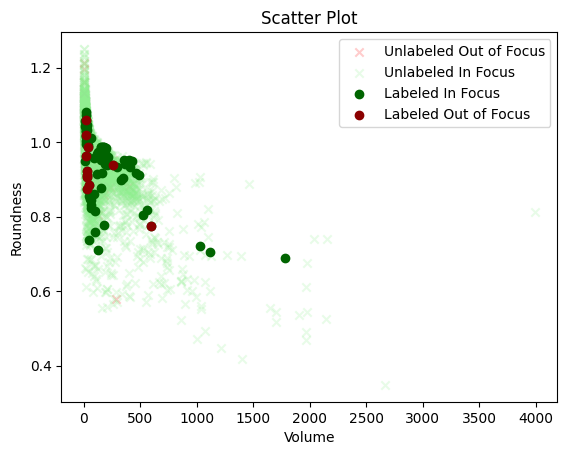

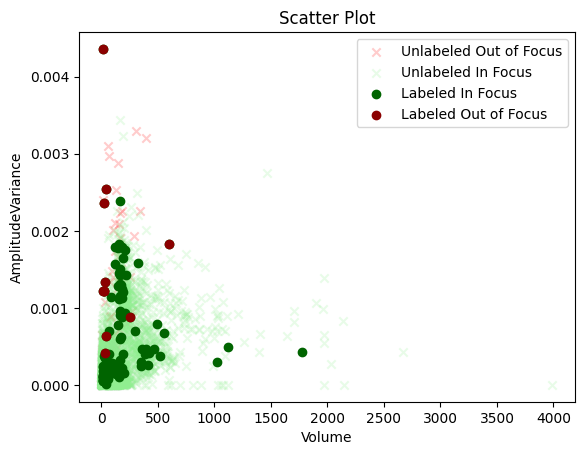

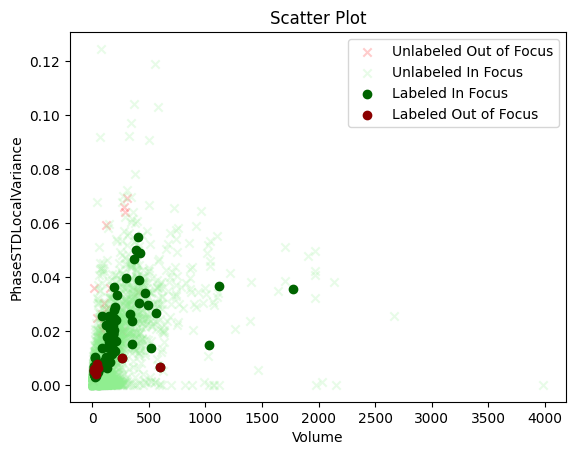

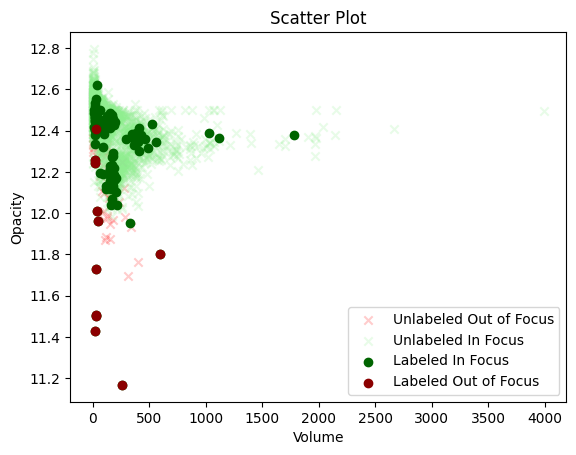

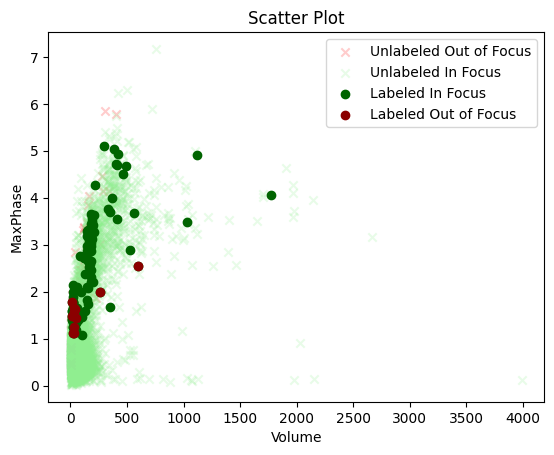

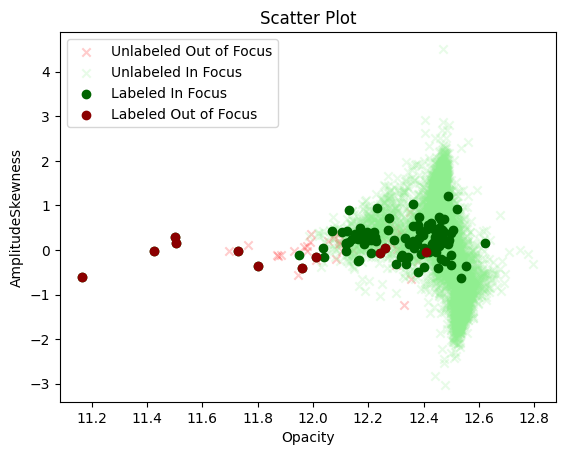

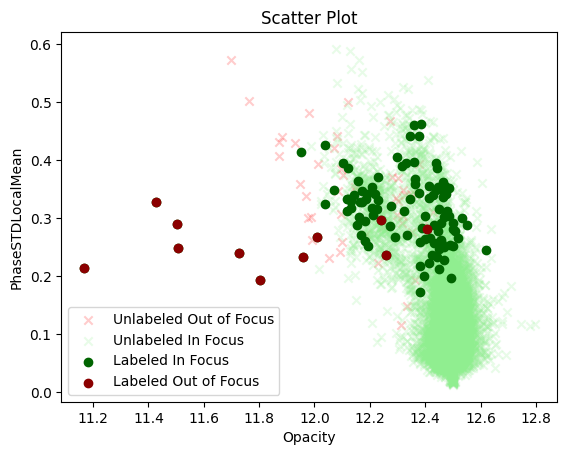

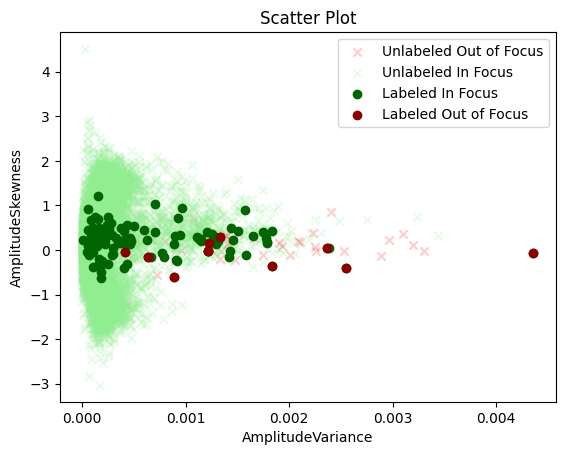

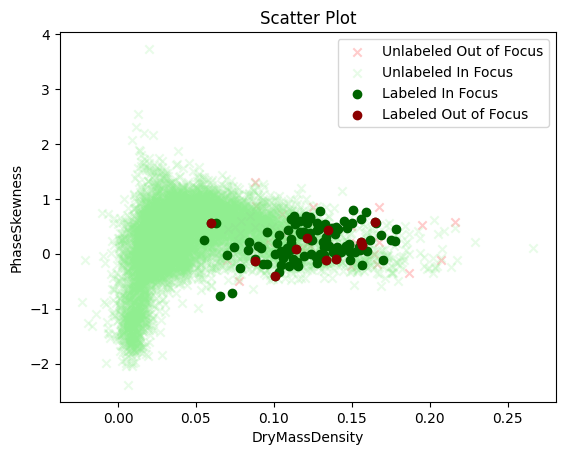

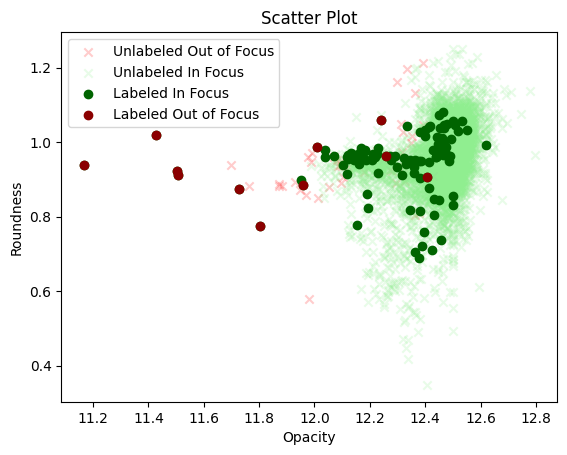

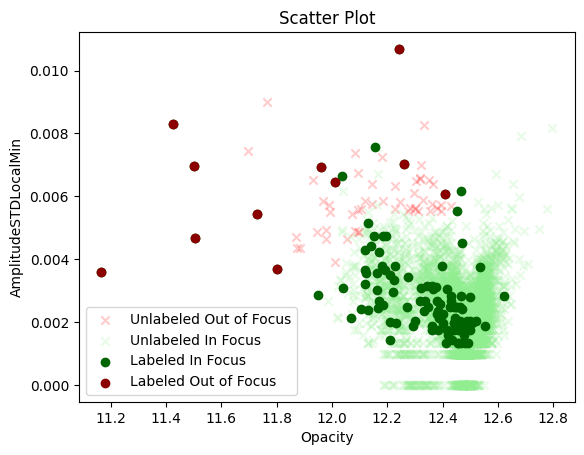

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
df_labeled = pd.read_csv("labeled_examples.csv")
df_labeled_out_of_focus = df_labeled[df_labeled['Labels'] == "b'oof'"]
df_labeled_in_focus = df_labeled[df_labeled['Labels'] != "b'oof"]
# Assuming your datasets are pandas DataFrames
# df_unlabeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, df_labeled_out_of_focus

plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Volume', 'Roundness')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Volume', 'AmplitudeVariance')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Volume', 'PhaseSTDLocalVariance')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Volume', 'Opacity')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Volume', 'MaxPhase')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Opacity', 'AmplitudeSkewness')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Opacity', 'PhaseSTDLocalMean')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'AmplitudeVariance', 'AmplitudeSkewness')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'DryMassDensity', 'PhaseSkewness')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Opacity', 'Roundness')
plot_points_oof(df_unlabeled_out_of_focus, df_labeled_out_of_focus, df_unlabeled_in_focus, df_labeled_in_focus, 'Opacity', 'AmplitudeSTDLocalMin')

In [136]:
def plot_points(df_unlabeled, df_labeled, x_col, y_col):
    # Get the unique labels from the labeled data
    labels = df_labeled['Labels'].unique()
    
    # Create a color palette with the same number of colors as unique labels
    label_palette = sns.color_palette("Set1", len(labels))
    
    # Create a dictionary to map labels to colors
    label_color_map = dict(zip(labels, label_palette))
    
    # Create a figure and two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot 1: Density plot with filled colors
    sns.kdeplot(data=df_unlabeled, x=x_col, y=y_col, cmap='magma', fill=True, thresh=0, levels=np.linspace(0, 1, 50), ax=axs[0])
    axs[0].set_title('Density Plot')
    
    # Plot 2: Scatter plot
    sns.scatterplot(data=df_unlabeled, x=x_col, y=y_col, hue='PredictedLabels', palette=label_color_map, ax=axs[1], alpha=0.2, marker='x')
    sns.scatterplot(data=df_labeled, x=x_col, y=y_col, hue='Labels', palette=label_color_map, ax=axs[1], marker='o')
    axs[1].set_title('Scatter Plot')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the figure
    plt.show()


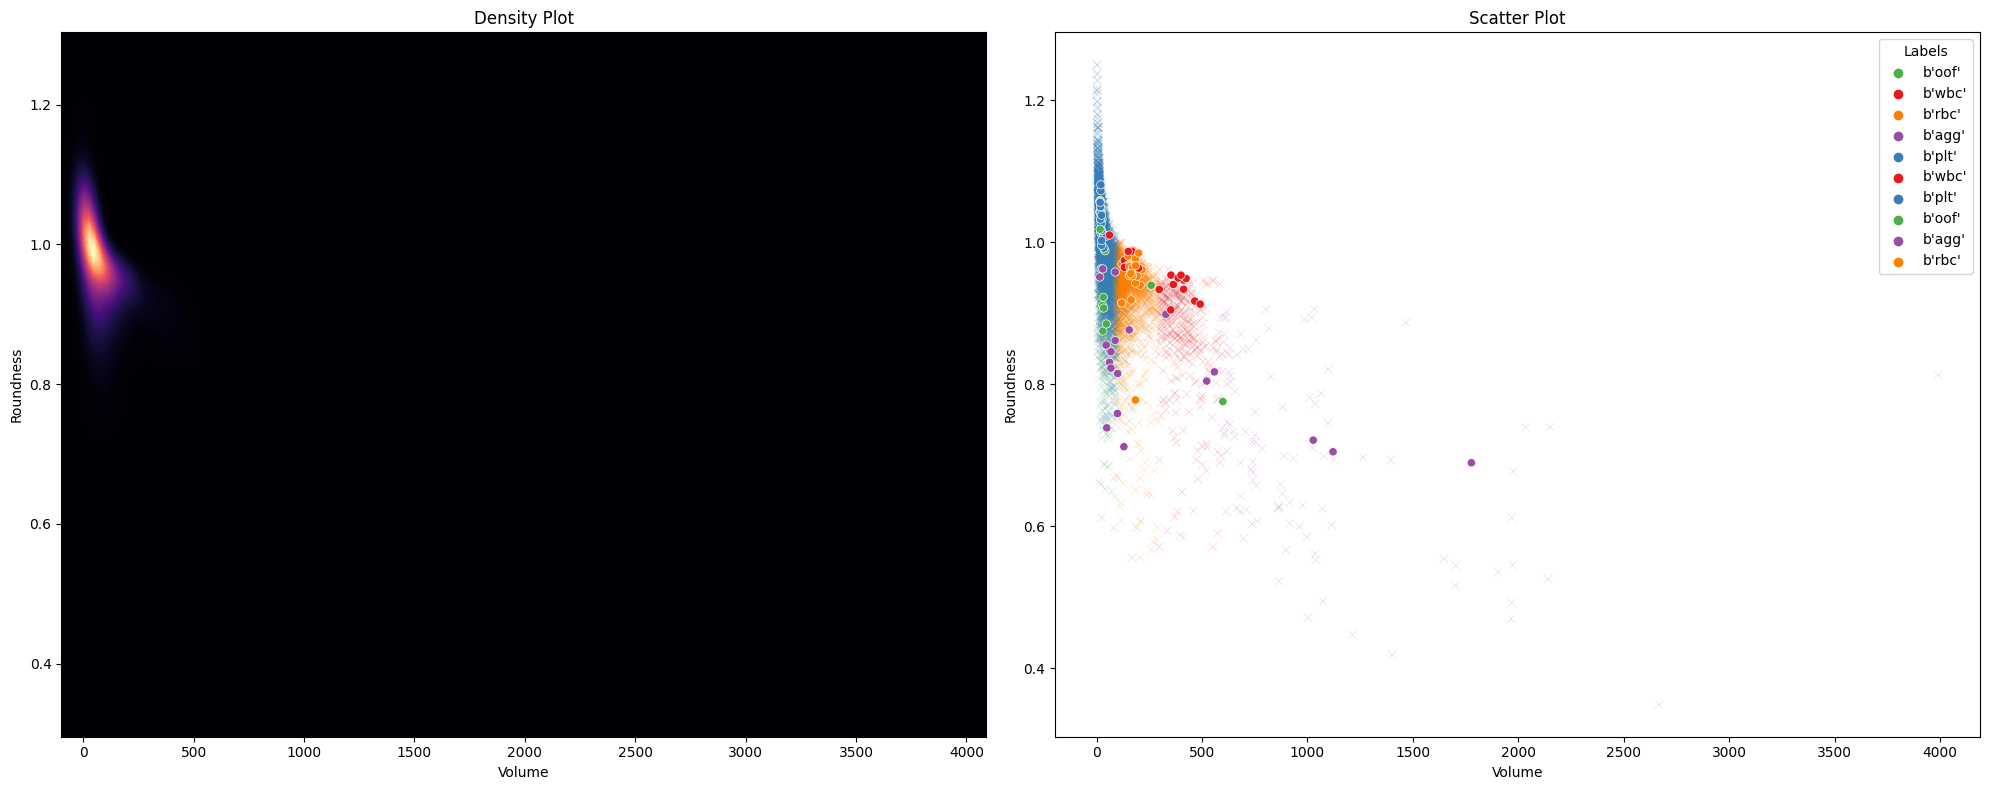

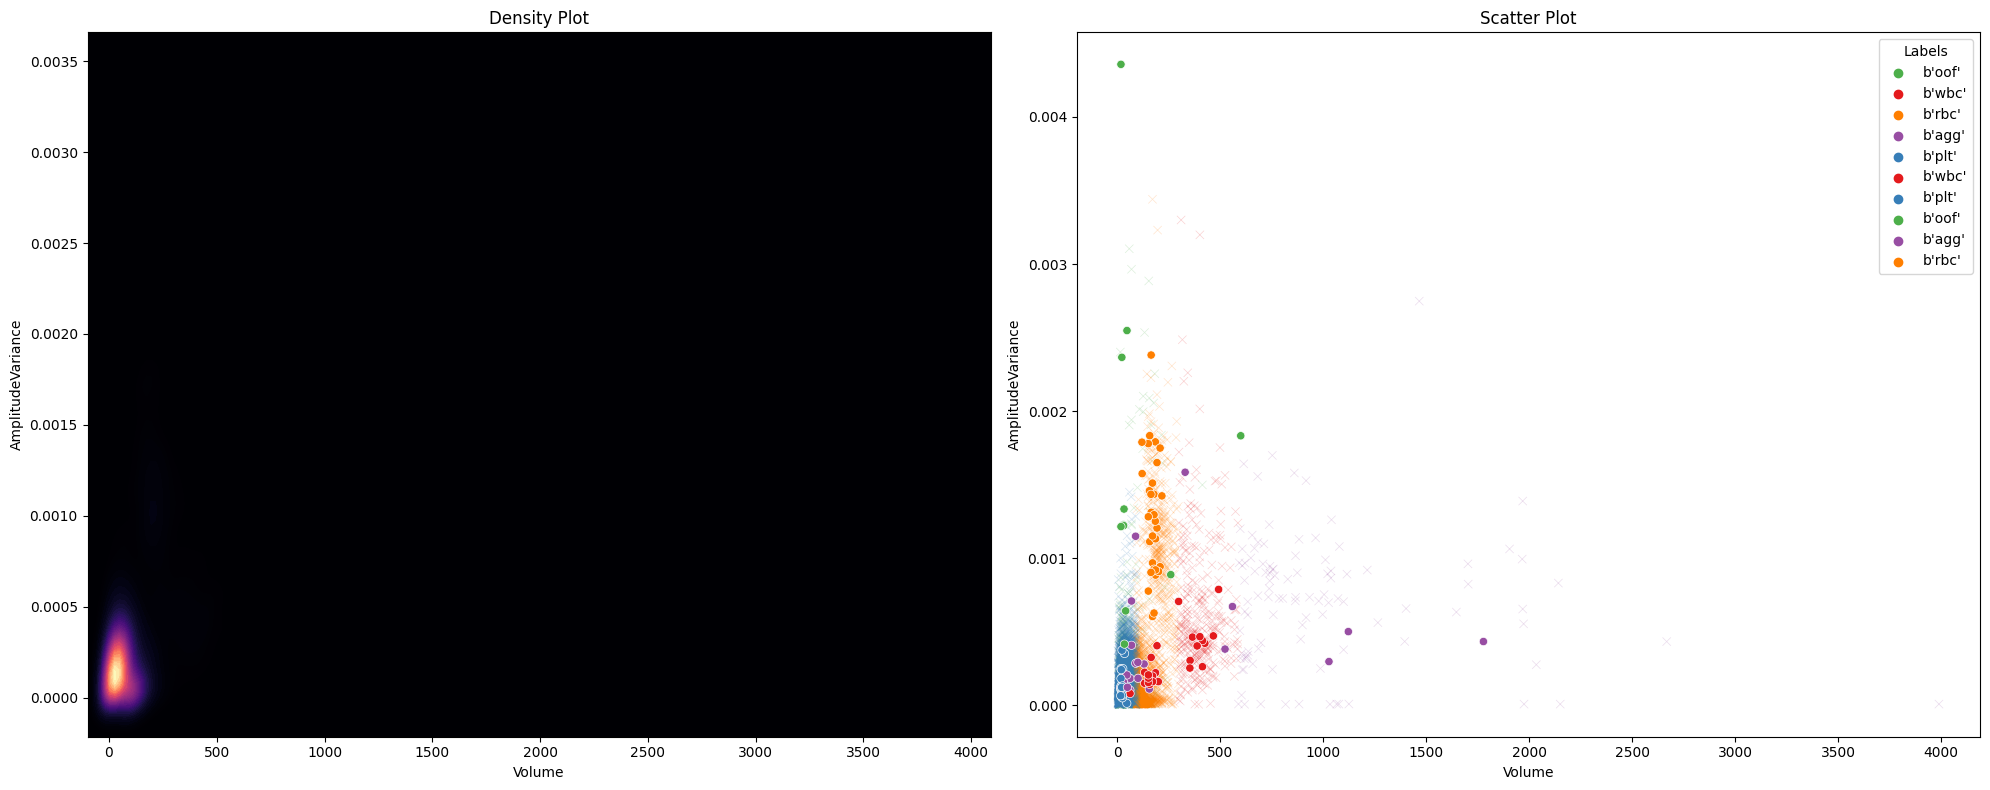

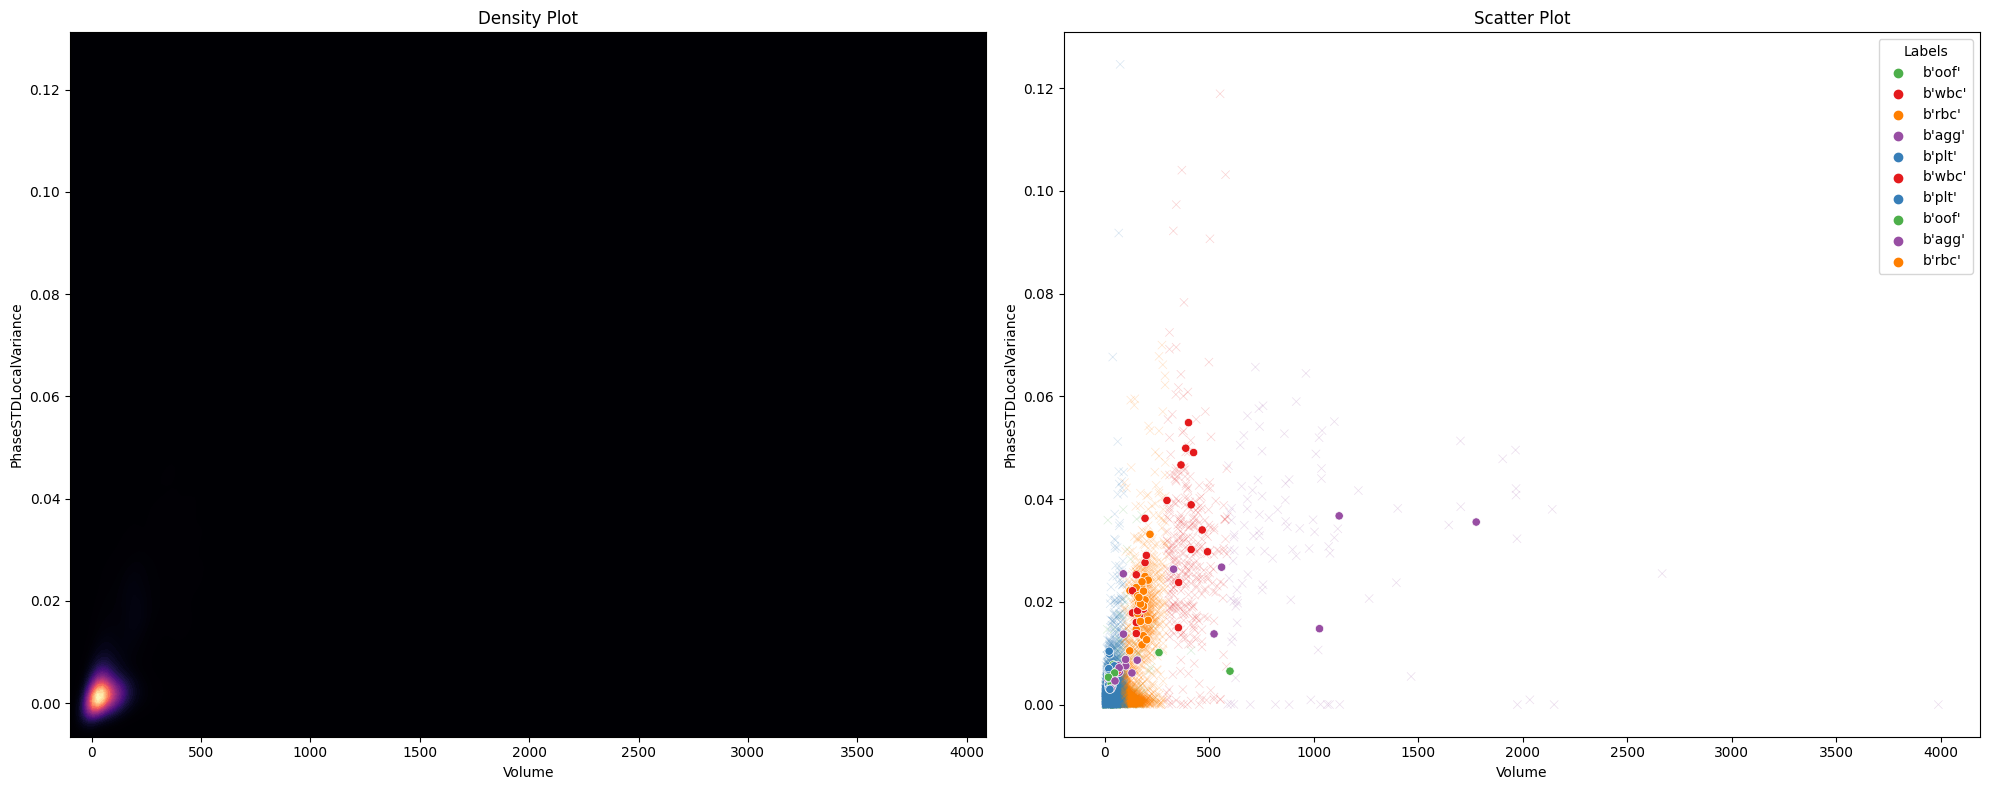

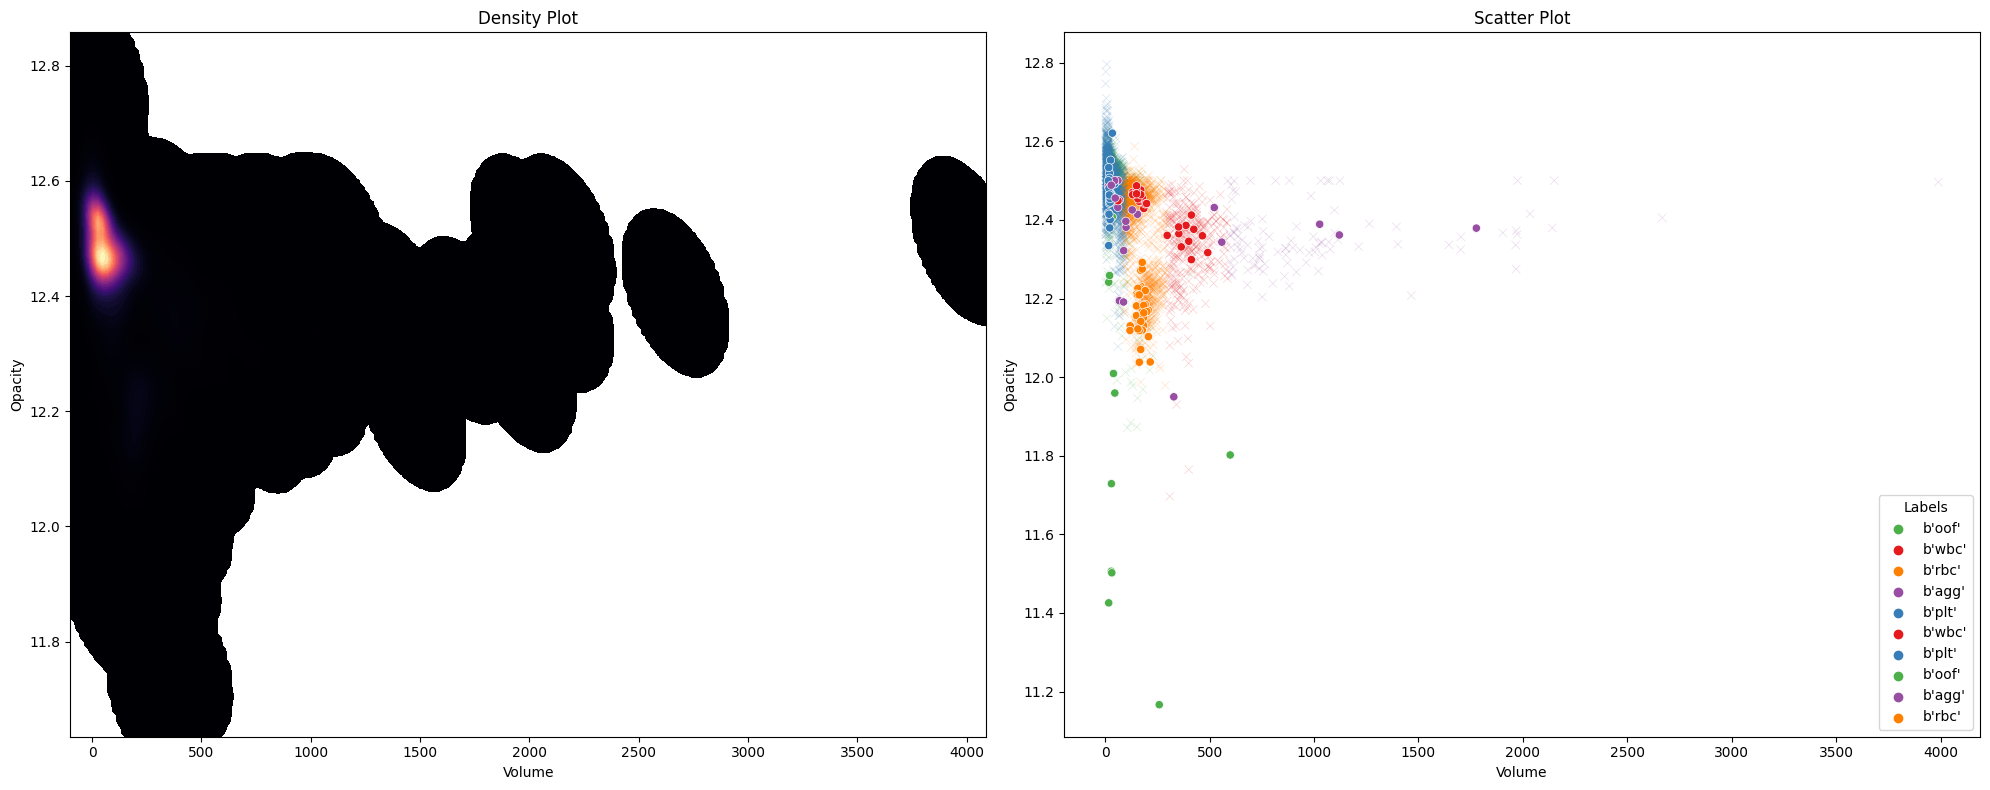

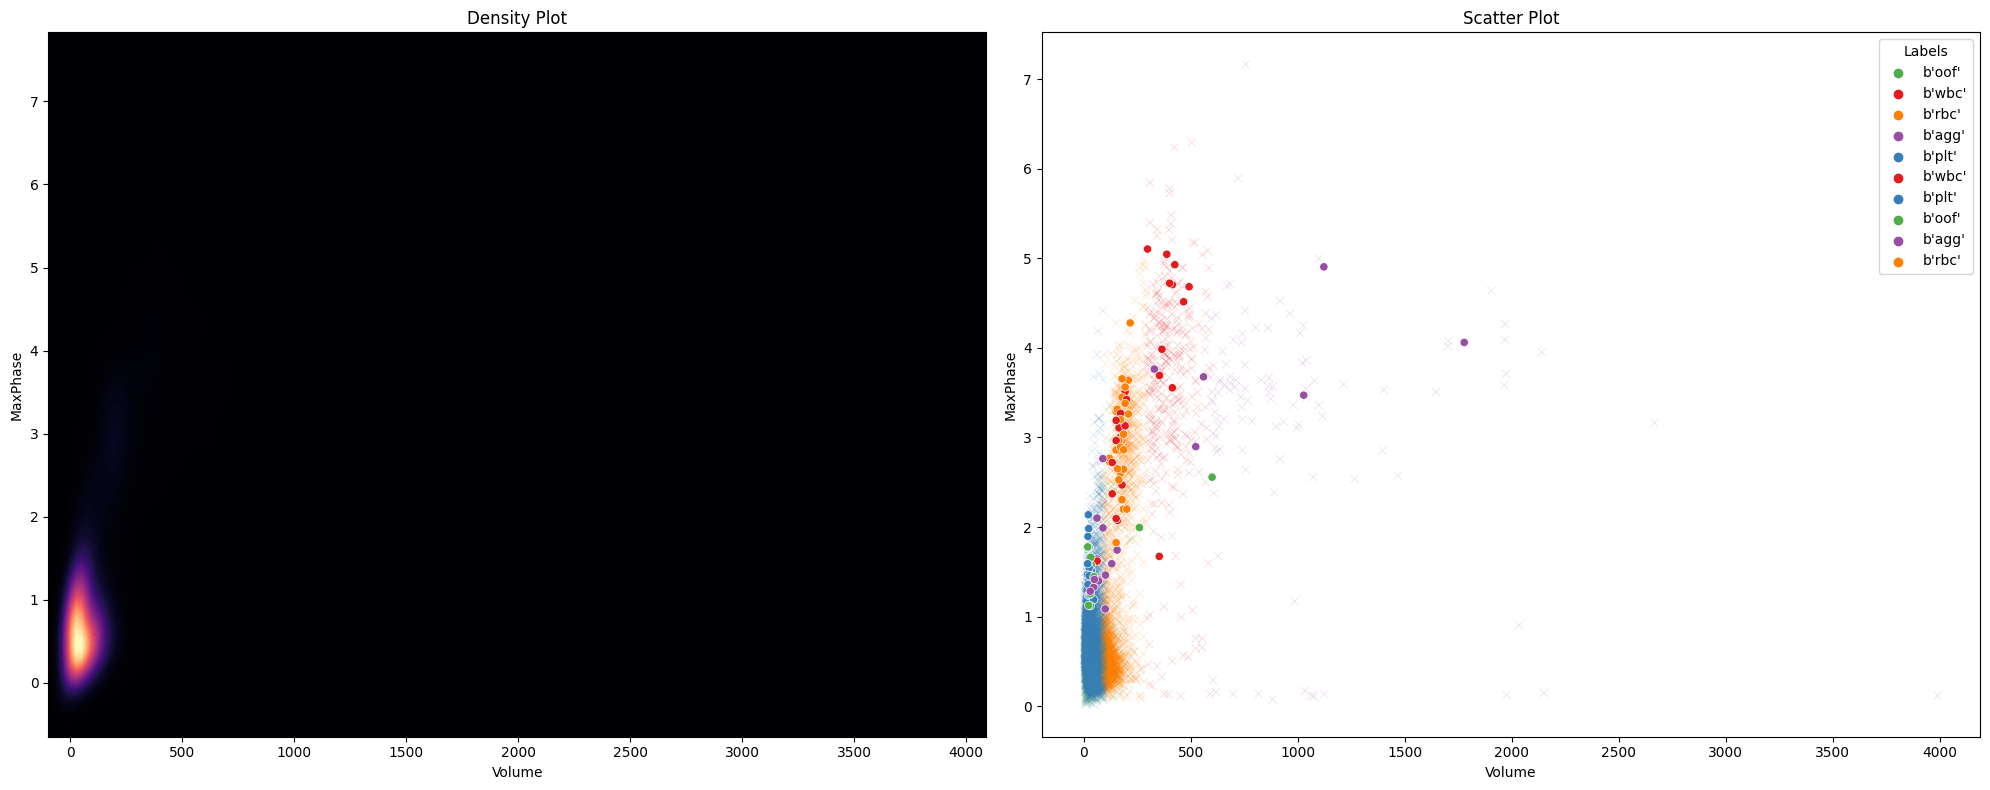

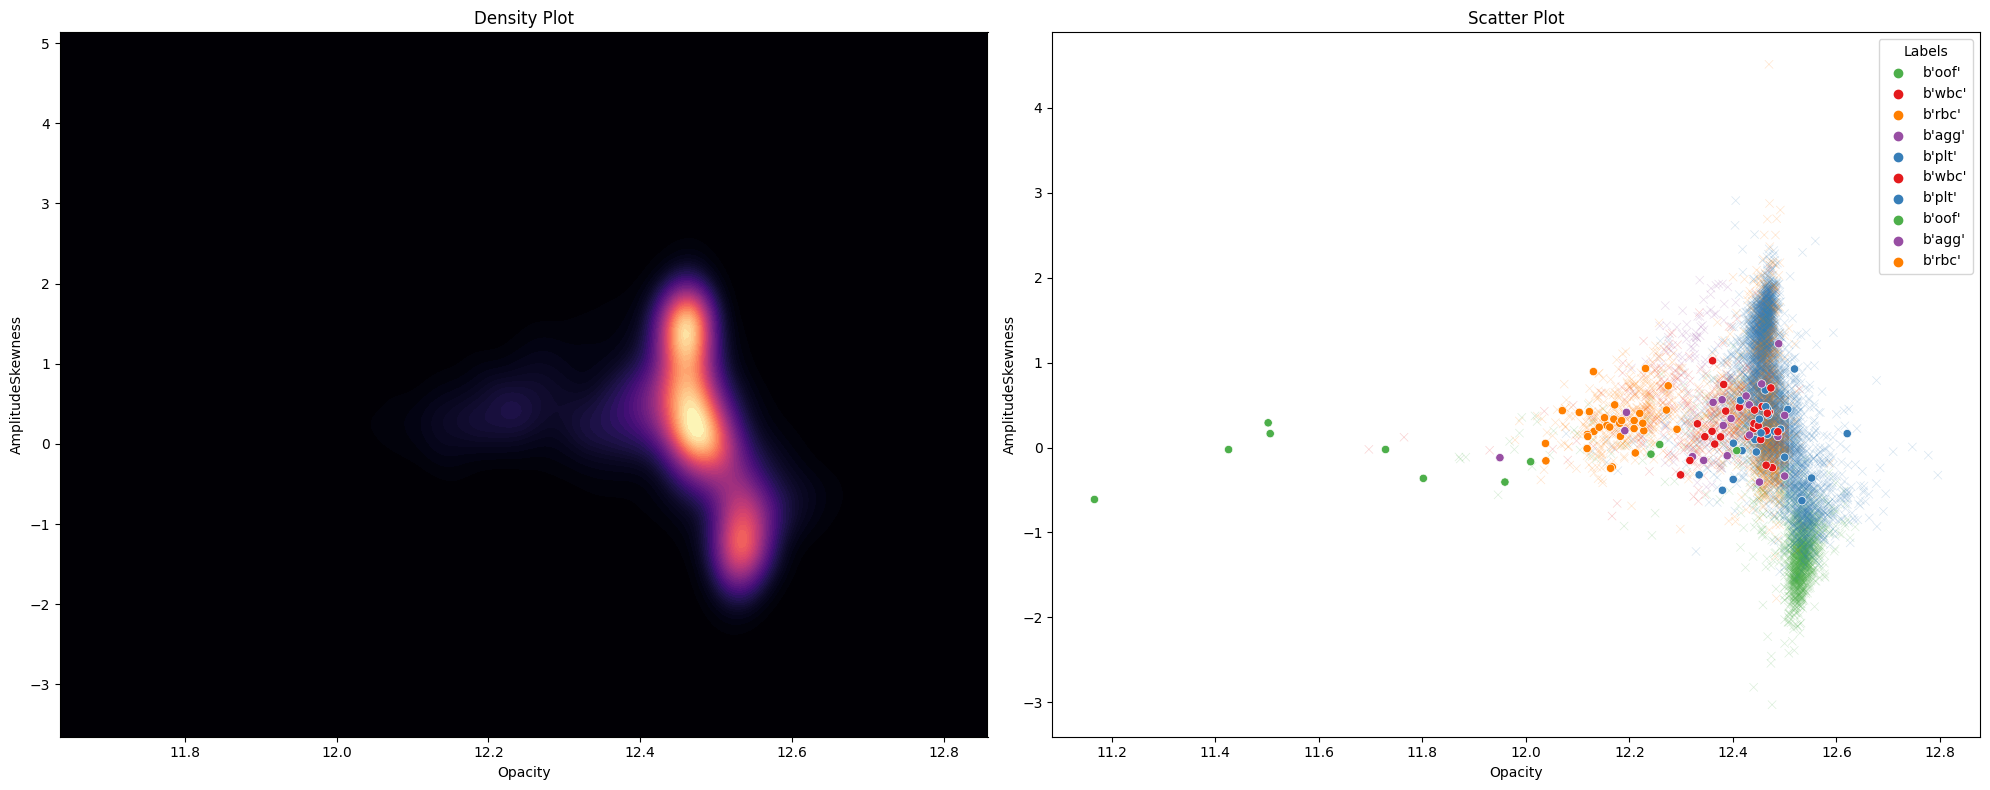

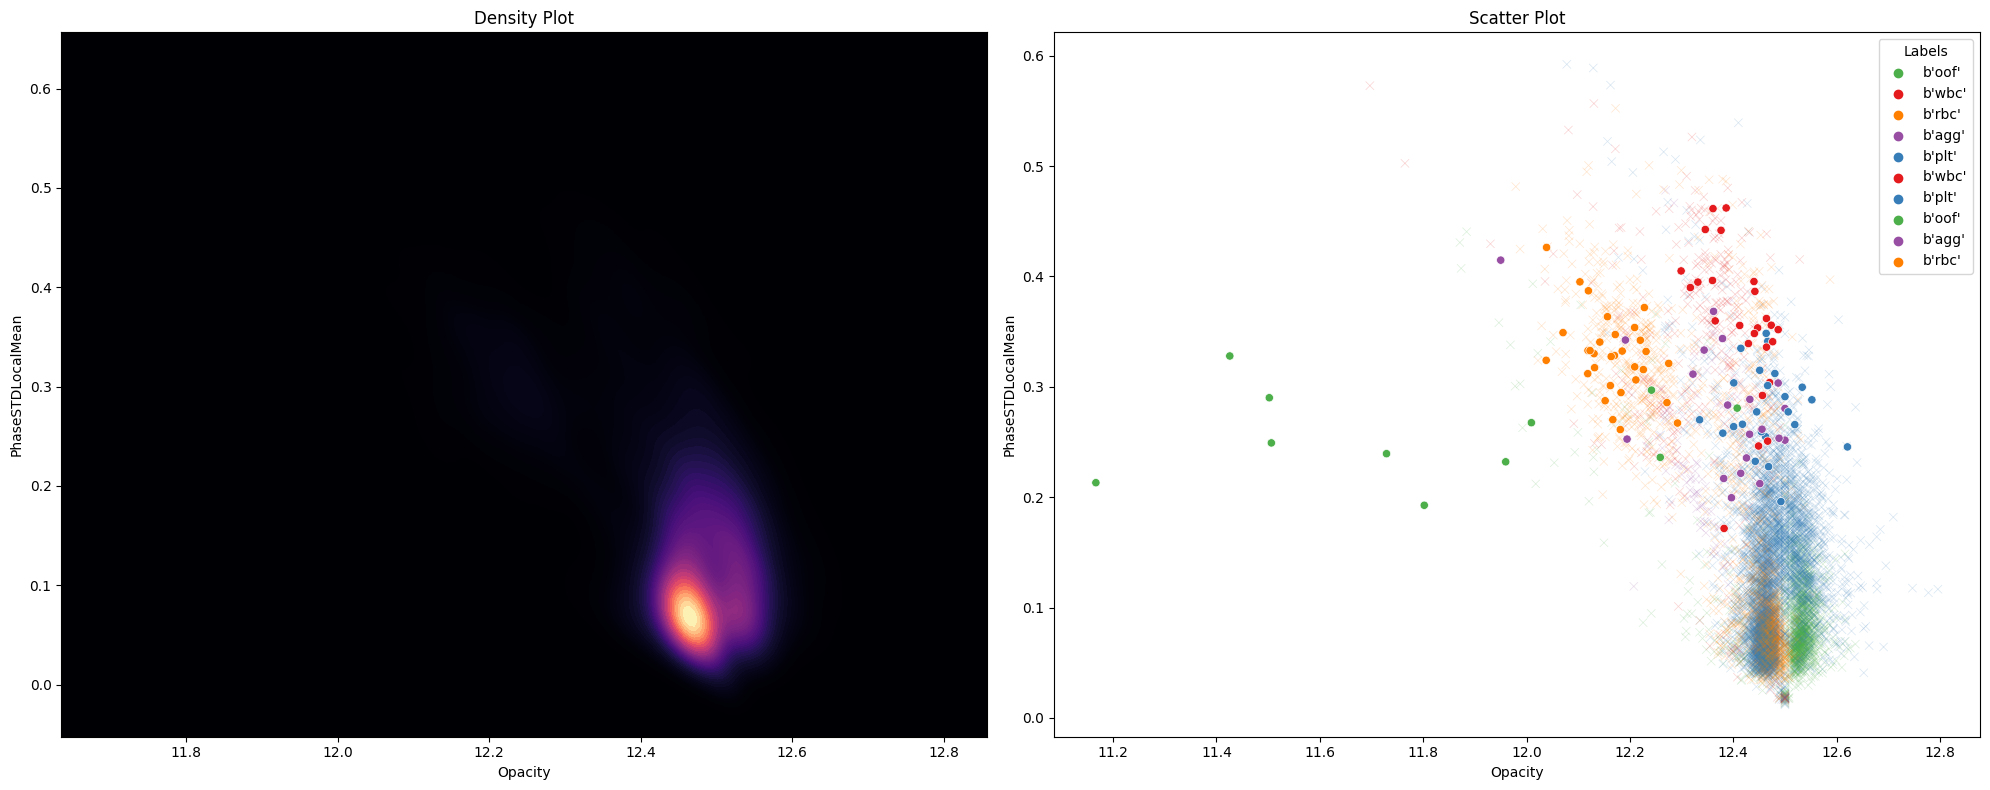

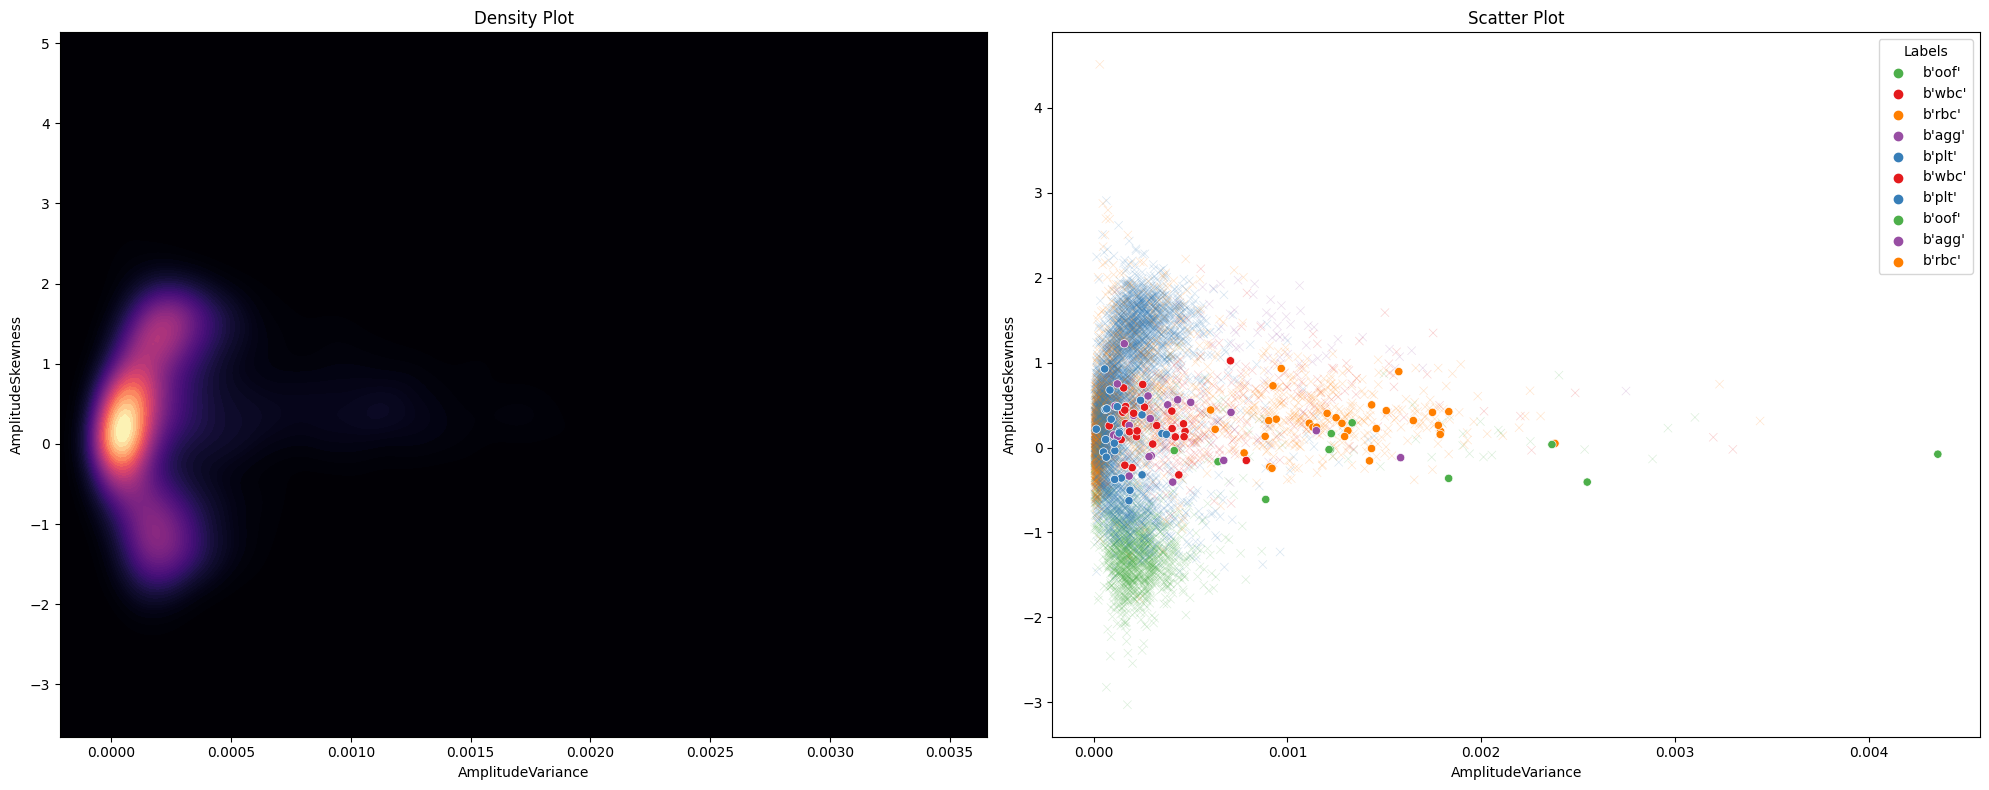

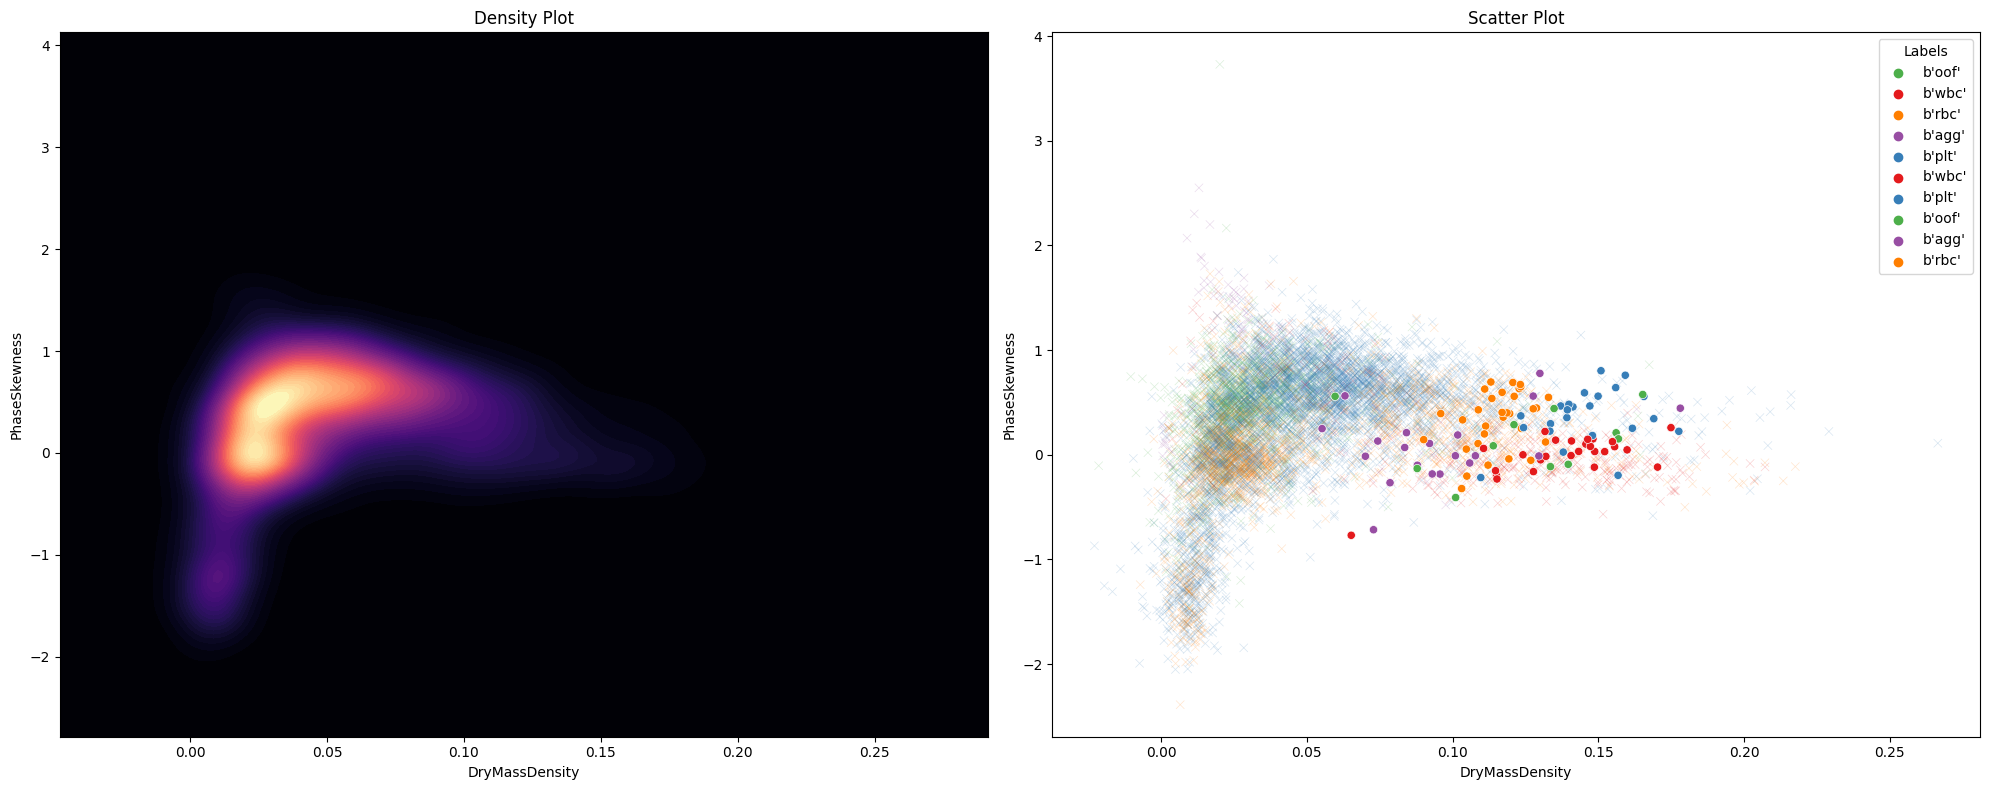

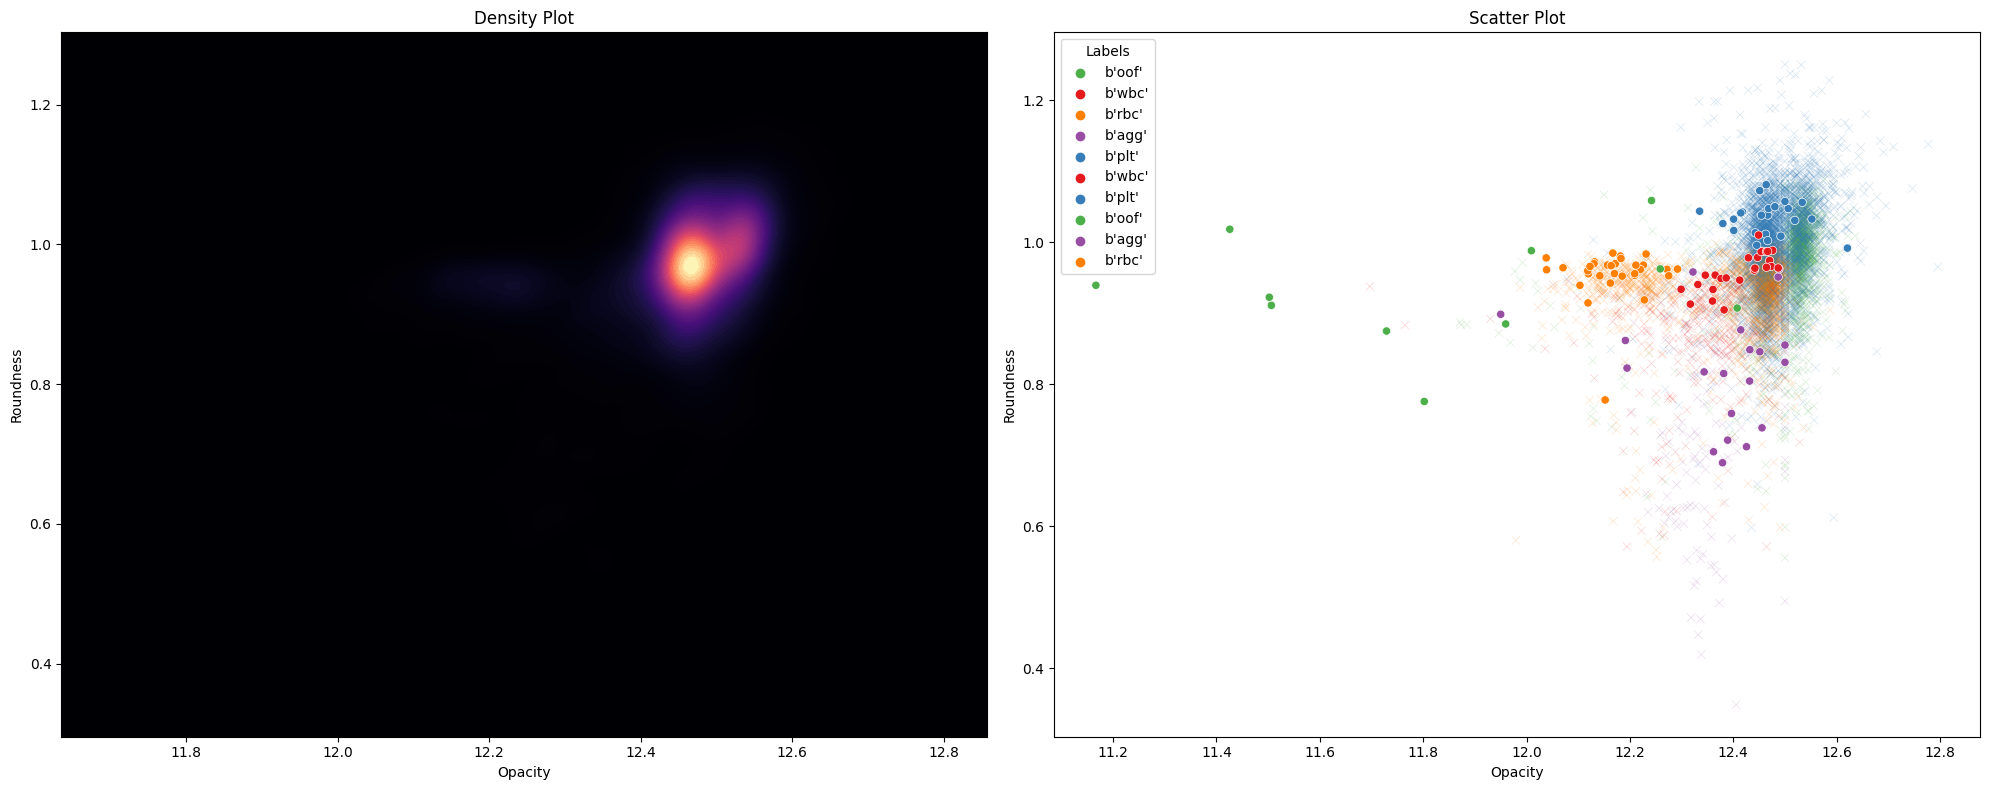

In [137]:
plot_points(df_unlabeled, df_labeled, 'Volume', 'Roundness')
plot_points(df_unlabeled, df_labeled, 'Volume', 'AmplitudeVariance')
plot_points(df_unlabeled, df_labeled, 'Volume', 'PhaseSTDLocalVariance')
plot_points(df_unlabeled, df_labeled, 'Volume', 'Opacity')
plot_points(df_unlabeled, df_labeled, 'Volume', 'MaxPhase')
plot_points(df_unlabeled, df_labeled, 'Opacity', 'AmplitudeSkewness')
plot_points(df_unlabeled, df_labeled, 'Opacity', 'PhaseSTDLocalMean')
plot_points(df_unlabeled, df_labeled, 'AmplitudeVariance', 'AmplitudeSkewness')
plot_points(df_unlabeled, df_labeled, 'DryMassDensity', 'PhaseSkewness')
plot_points(df_unlabeled, df_labeled, 'Opacity', 'Roundness')

In [55]:
unlabeled_data_with_range

Volume  Roundness    Opacity  AmplitudeVariance  AmplitudeSkewness  \
0     335.455433   0.922908  12.233833           0.001193           0.451795   
1     218.376582   0.857438  12.120816           0.001647           0.503977   
2     397.181887   0.864605  12.313433           0.000328           0.311589   
3      53.409377   0.784959  12.500000           0.000005          -0.196262   
4     241.835004   0.918540  12.278369           0.001011           0.843964   
...          ...        ...        ...                ...                ...   
7820   71.086127   0.985532  12.500000           0.000033           0.025513   
7821   33.173526   0.734917  12.493323           0.000057           0.407178   
7822  315.432841   0.927747  12.145110           0.002485           0.642907   
7823  591.472120   0.699009  12.269433           0.000968           1.670282   
7824  219.205920   0.924799  12.257653           0.000709           0.363448   

      DryMassDensity  MaxPhase  PhaseVariance  PhaseSkewness  \
0           0.058539    2.9700       0.654028       0.641915   
1           0.050292    1.8670       0.252883       0.735922   
2           0.054496    2.2460       0.526834       0.268666   
3           0.006130    0.1021       0.000383       0.028868   
4           0.086293    3.3770       0.904529       0.578630   
...              ...       ...            ...            ...   
7820        0.039307    0.5310       0.020818      -0.471750   
7821        0.031562    0.6130       0.023320       0.151877   
7822        0.059955    2.2580       0.556477       0.324923   
7823        0.039162    3.6660       1.077836       0.862393   
7824        0.076153    2.6290       0.659509       0.398694   

      PhaseSTDLocalMean  ...  PhaseSTDLocalVariance_Range_b'wbc'  \
0              0.251593  ...                            0.275558   
1              0.196332  ...                            0.011390   
2              0.225334  ...                            0.230141   
3              0.017292  ...                           -0.137563   
4              0.318285  ...                            0.356768   
...                 ...  ...                                 ...   
7820           0.076683  ...                           -0.111960   
7821           0.097870  ...                           -0.118946   
7822           0.247625  ...                            0.402651   
7823           0.269300  ...                            0.826508   
7824           0.291996  ...                            0.256484   

      PhaseSTDLocalVariance_Range_b'plt'  PhaseSTDLocalVariance_Range_b'oof'  \
0                               2.284781                            2.634935   
1                               0.568974                            0.511088   
2                               1.989791                            2.269792   
3                              -0.398502                           -0.686465   
4                               2.812253                            3.287846   
...                                  ...                                 ...   
7820                           -0.232207                           -0.480623   
7821                           -0.277585                           -0.536792   
7822                            3.110275                            3.656741   
7823                            5.863295                            7.064463   
7824                            2.160894                            2.481586   

      PhaseSTDLocalVariance_Range_b'agg'  PhaseSTDLocalVariance_Range_b'rbc'  \
0                               0.500365                            0.417490   
1                               0.121375                           -0.144178   
2                               0.435207                            0.320926   
3                              -0.092322                           -0.460880   
4                               0.616874                            0.590158   
...                   